In [3]:
sql = '''SELECT
    m.CC_LIST_ID,
    m.CITY,
    m.STATE,
    m.ZIP,
    m.FIPS_COUNTY_CD,
    m.MOST_RECENT_SALE,
    m.TRENDED_PRIOR_SALE,
    m.MARKET_PPSF,
    m.STATUS,
    m.A_DATE,
    m.PRICE,
    m.SALE_TYPE,
    m.CONCESSIONS_INDICATOR,
    m.CONCESSIONS_AMOUNT,
    m.STANDARDIZED_PROPERTY_TYPE,
    m.MLS_PROPERTY_TYPE,
    m.MLS_PROPERTY_SUB_TYPE,
    m.PROPERTY_OWNERSHIP_TYPE,
    m.MLS_DAYS_ON_MARKET,
    m.MLS_CUMULATIVE_DAYS_ON_MARKET,
    m.ASSESSED_YEAR,
    m.ASSESSED_TOTAL_VALUE,
    m.TAX_AMOUNT,
    m.TAX_AMOUNT_FREQUENCY,
    m.YEAR_BUILT,
    m.EFFECTIVE_YEAR_BUILT,
    m.LOT_SQFT,
    m.LOT_SIZE_SOURCE,
    m.LOT_DIMENSIONS,
    m.LOT_FEATURE_LIST,
    m.GLA_SQFT,
    m.GLA_SQFT_SOURCE,
    m.FLOORS_IN_PROPERTY,
    m.FLOORS_IN_BUILDING,
    m.NUMBER_OF_UNITS,
    m.ROOMS,
    m.BEDROOMS,
    m.FULL_BATHS,
    m.HALF_BATHS,
    m.BASEMENT_TYPE,
    m.PROPERTY_CONDITION,
    m.DISCLOSURES_DESCRIPTION,
    m.PROPERTY_QUALITY,
    m.GARAGE_SPACES,
    m.GARAGE_TYPE,
    m.PARKING_FEATURES,
    m.POOL_SPA_TYPES,
    m.CURRENT_OCCUPANCY_TYPE,
    m.VIEW_DESCRIPTION,
    m.HEATING,
    m.COOLING,
    m.FIREPLACE_TYPE,
    m.FIREPLACE_COUNT,
    m.FOUNDATION_TYPE,
    m.ROOF_TYPE,
    m.HOME_STYLE,
    m.PORCH_OR_PATIO,
    m.UTILITIES_LIST,
    m.ELECTRICITY_INCLUDED,
    m.ELECTRICITY_DESCRIPTION,
    m.WATER_SOURCE,
    m.SEWER_DESCRIPTION,
    m.GAS_DESCRIPTION,
    m.OTHER_EQUIPMENT_INCLUDED_LIST,
    m.LAUNDRY_FEATURES,
    m.APPLIANCES_INCLUDED,
    m.INTERIOR_FEATURE_LIST,
    m.EXTERIOR_FEATURE_LIST,
    m.FENCING_DESCRIPTION,
    m.HORSE_ZONING,
    m.SENIOR_COMMUNITY_INDICATOR,
    m.ZONING_CODE,
    m.ZONING_DESCRIPTION,
    m.HOA_FLAG_YN,
    m.HOA_NAME,
    m.HOA_FEE_AMOUNT,
    m.HOA_FEE_FREQUENCY,
    m.SECOND_HOA_NAME,
    m.SECOND_HOA_FEE_AMOUNT,
    m.SECOND_HOA_FEE_FREQUENCY,
    m.HOA_FEE_INCLUDES,
    m.HOA_AMENITITES,
    m.ELEMENTARY_SCHOOL_NAME,
    m.ELEMENTARY_SCHOOL_DISTRICT,
    m.MIDDLE_SCHOOL_NAME,
    m.MIDDLE_SCHOOL_DISTRICT,
    m.HIGH_SCHOOL_NAME,
    m.HIGH_SCHOOL_DISTRICT
FROM SCRATCH.BASIS.STG_MLS m
LEFT JOIN SCRATCH.PUBLIC.EXPANDED_IMAGE_DATA e
    ON m.CC_LIST_ID = e.CC_LIST_ID
WHERE
    m.PRICE IS NOT NULL
    AND m.ASSESSED_TOTAL_VALUE IS NOT NULL
    AND m.ASSESSED_YEAR IN (2025, 2026);'''

In [4]:
import json
import snowflake.connector

with open('/Users/jenny.lin/ImageDataParser/XGBoost_with_ImageData/config/config.json', 'r') as f:
    config = json.load(f)

conn = snowflake.connector.connect(**config)

cursor = conn.cursor()
cursor.execute(sql)
df = cursor.fetch_pandas_all()

In [5]:
df.shape

(145218, 88)

In [6]:
df.columns

Index(['CC_LIST_ID', 'CITY', 'STATE', 'ZIP', 'FIPS_COUNTY_CD',
       'MOST_RECENT_SALE', 'TRENDED_PRIOR_SALE', 'MARKET_PPSF', 'STATUS',
       'A_DATE', 'PRICE', 'SALE_TYPE', 'CONCESSIONS_INDICATOR',
       'CONCESSIONS_AMOUNT', 'STANDARDIZED_PROPERTY_TYPE', 'MLS_PROPERTY_TYPE',
       'MLS_PROPERTY_SUB_TYPE', 'PROPERTY_OWNERSHIP_TYPE',
       'MLS_DAYS_ON_MARKET', 'MLS_CUMULATIVE_DAYS_ON_MARKET', 'ASSESSED_YEAR',
       'ASSESSED_TOTAL_VALUE', 'TAX_AMOUNT', 'TAX_AMOUNT_FREQUENCY',
       'YEAR_BUILT', 'EFFECTIVE_YEAR_BUILT', 'LOT_SQFT', 'LOT_SIZE_SOURCE',
       'LOT_DIMENSIONS', 'LOT_FEATURE_LIST', 'GLA_SQFT', 'GLA_SQFT_SOURCE',
       'FLOORS_IN_PROPERTY', 'FLOORS_IN_BUILDING', 'NUMBER_OF_UNITS', 'ROOMS',
       'BEDROOMS', 'FULL_BATHS', 'HALF_BATHS', 'BASEMENT_TYPE',
       'PROPERTY_CONDITION', 'DISCLOSURES_DESCRIPTION', 'PROPERTY_QUALITY',
       'GARAGE_SPACES', 'GARAGE_TYPE', 'PARKING_FEATURES', 'POOL_SPA_TYPES',
       'CURRENT_OCCUPANCY_TYPE', 'VIEW_DESCRIPTION', 'HEATING', 

In [7]:
print(f"Total rows: {len(df)}")
print(f"Unique CC_LIST_IDs: {df['CC_LIST_ID'].nunique()}")
print(f"Price range: ${df['PRICE'].min():,.0f} - ${df['PRICE'].max():,.0f}")
print(f"Assessed value range: ${df['ASSESSED_TOTAL_VALUE'].min():,.0f} - ${df['ASSESSED_TOTAL_VALUE'].max():,.0f}")

Total rows: 145218
Unique CC_LIST_IDs: 40097
Price range: $1 - $54,950,000
Assessed value range: $0 - $794,958,200


Loaded 145,218 rows

Price distribution:
  Min:    $1
  1%:     $70,000
  Median: $399,999
  99%:    $2,399,900
  Max:    $54,950,000

Removing 184 extreme outliers (< $10,000 or > $10,000,000)
Clean dataset: 145,034 properties
Features: 56

MODEL PERFORMANCE
R² Score:              0.8786
MAE:                   $84,810
RMSE:                  $166,043

Percentage Error Metrics:
  MAPE (mean):         19.86%  ← Sensitive to outliers
  MedAPE (median):     11.87%  ← BEST metric to use
  Trimmed MAPE:        16.07%  ← Excludes extreme errors

Prediction Accuracy:
  Within 10% of actual: 43.4%
  Within 20% of actual: 70.9%
  Within 30% of actual: 84.6%

ERROR ANALYSIS BY PRICE RANGE:
----------------------------------------------------------------------
< $200K         → MedAPE:  29.3%  |  MAE: $    61,863  |  Count: 2,880
$200K - $500K   → MedAPE:  11.1%  |  MAE: $    50,828  |  Count: 15,612
$500K - $1M     → MedAPE:  10.7%  |  MAE: $    96,609  |  Count: 8,251
> $1M           → MedAPE:  

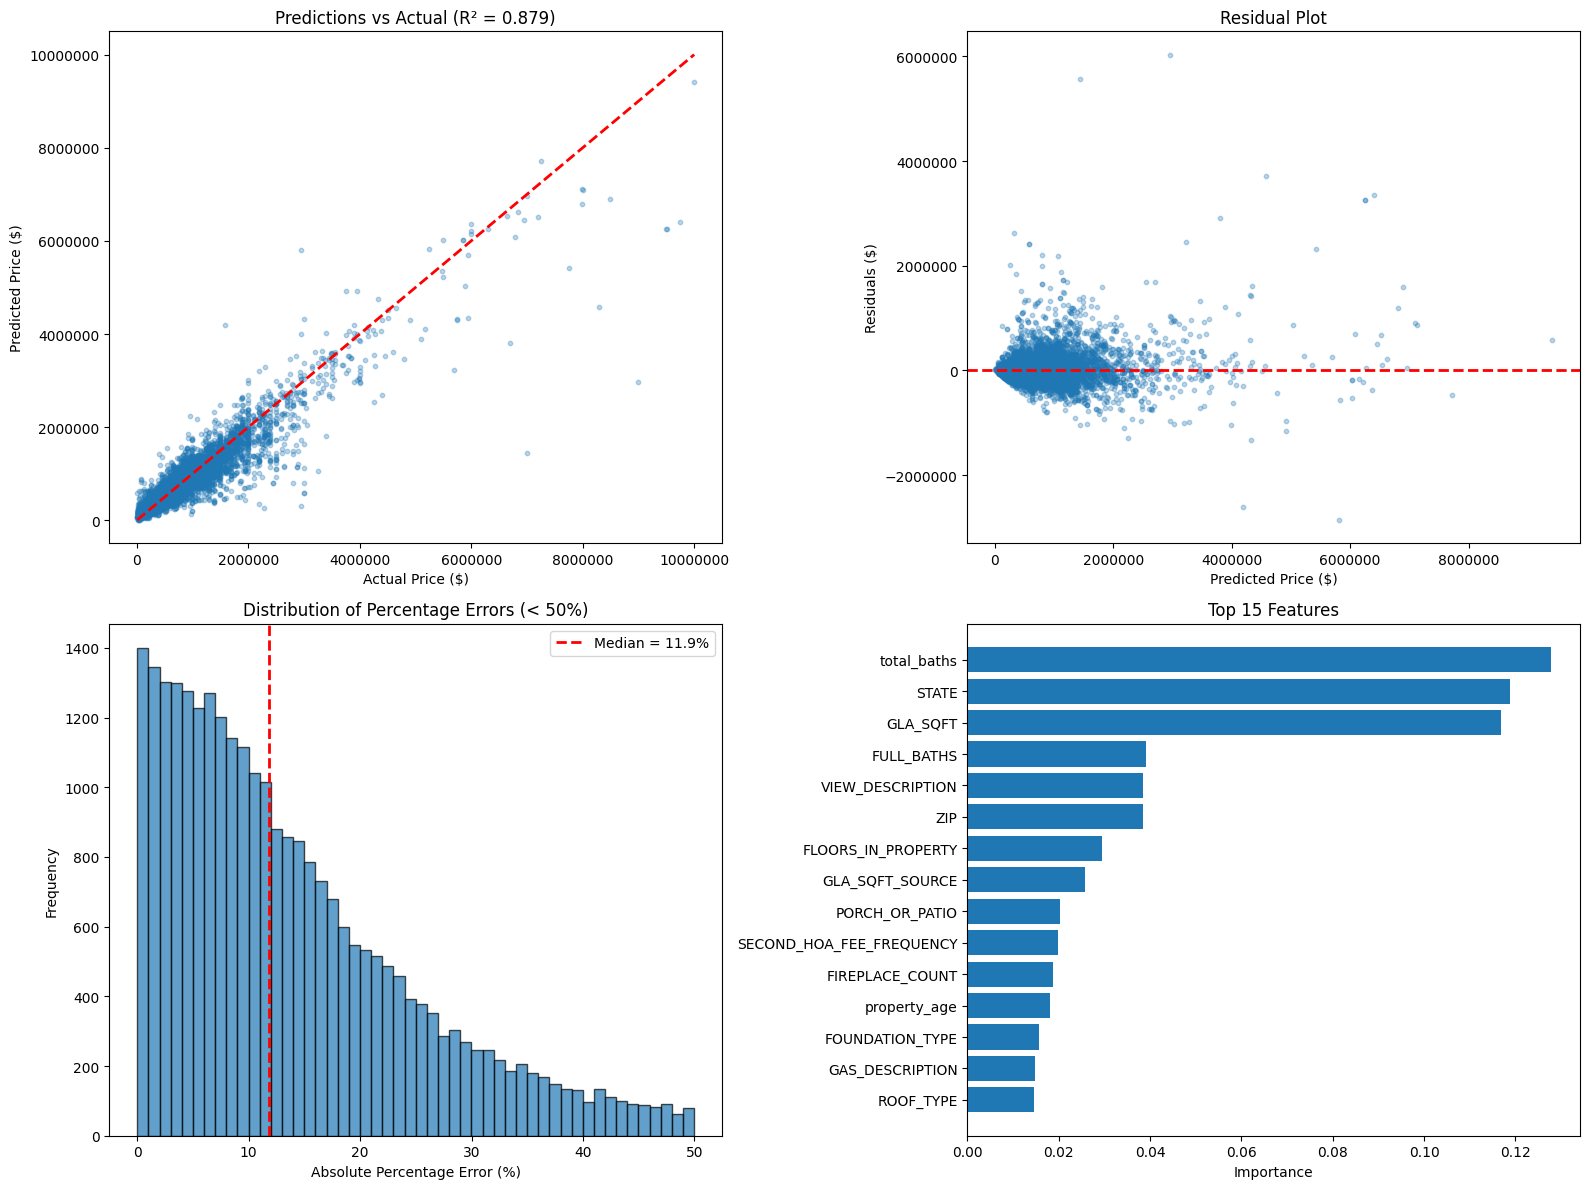


Top 10 Features:
  total_baths                    0.1278
  STATE                          0.1187
  GLA_SQFT                       0.1169
  FULL_BATHS                     0.0391
  VIEW_DESCRIPTION               0.0386
  ZIP                            0.0384
  FLOORS_IN_PROPERTY             0.0295
  GLA_SQFT_SOURCE                0.0259
  PORCH_OR_PATIO                 0.0203
  SECOND_HOA_FEE_FREQUENCY       0.0199

KEY INSIGHTS
✓ Use MedAPE (11.9%) instead of MAPE (19.9%)
✓ 71% of predictions are within 20% of actual price
✓ Model works best for properties $285,000 - $625,000
✓ For better accuracy on extreme prices, use segmented models


In [13]:
"""
XGBoost Price Prediction - Fixed MAPE Issue
Handles outliers and uses MedAPE (Median Absolute Percentage Error)
Copy-paste this entire cell into Jupyter
"""

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv("/Users/jenny.lin/ImageDataParser/XGBoost_with_ImageData/XGBoost_Model_on_Basis_AVM_Data/sql_xgboost_input_basis.csv")
print(f"Loaded {len(df):,} rows")

# Remove leaky columns
leaky = ['ASSESSED_YEAR', 'ASSESSED_TOTAL_VALUE', 'TAX_AMOUNT', 'TAX_AMOUNT_FREQUENCY',
         'MARKET_PPSF', 'MOST_RECENT_SALE', 'TRENDED_PRIOR_SALE', 'CONCESSIONS_AMOUNT',
         'MLS_DAYS_ON_MARKET', 'MLS_CUMULATIVE_DAYS_ON_MARKET']
X = df.drop(columns=leaky + ['PRICE', 'CC_LIST_ID', 'A_DATE', 'FIPS_COUNTY_CD'], errors='ignore')
y = df['PRICE'].dropna()
X = X.loc[y.index]

# ============================================================================
# ANALYZE AND CLEAN PRICE DATA
# ============================================================================
print(f"\nPrice distribution:")
print(f"  Min:    ${y.min():,.0f}")
print(f"  1%:     ${y.quantile(0.01):,.0f}")
print(f"  Median: ${y.quantile(0.50):,.0f}")
print(f"  99%:    ${y.quantile(0.99):,.0f}")
print(f"  Max:    ${y.max():,.0f}")

# Remove extreme outliers (likely data errors)
# Properties < $10k or > $10M are probably errors
min_price = 10000
max_price = 10000000

outlier_mask = (y >= min_price) & (y <= max_price)
print(f"\nRemoving {(~outlier_mask).sum()} extreme outliers (< ${min_price:,} or > ${max_price:,})")

X = X[outlier_mask]
y = y[outlier_mask]
print(f"Clean dataset: {len(y):,} properties")

# Engineer features
if 'YEAR_BUILT' in X.columns:
    X['property_age'] = 2026 - X['YEAR_BUILT']
if 'FULL_BATHS' in X.columns and 'HALF_BATHS' in X.columns:
    X['total_baths'] = X['FULL_BATHS'] + 0.5 * X['HALF_BATHS'].fillna(0)
if 'GARAGE_SPACES' in X.columns:
    X['has_garage'] = (X['GARAGE_SPACES'] > 0).astype(int)
if 'POOL_SPA_TYPES' in X.columns:
    X['has_pool'] = X['POOL_SPA_TYPES'].notna().astype(int)

# Preprocess
for col in X.select_dtypes(include=[np.number]).columns:
    X[col].fillna(X[col].median(), inplace=True)

for col in X.select_dtypes(include=['object']).columns:
    if X[col].nunique() < 100:
        X[col] = LabelEncoder().fit_transform(X[col].fillna('Unknown').astype(str))
    else:
        X = X.drop(columns=[col])

print(f"Features: {X.shape[1]}\n")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train, verbose=False)

# Evaluate
y_pred = model.predict(X_test)

# ============================================================================
# COMPREHENSIVE METRICS
# ============================================================================
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))

# Percentage errors
pct_errors = np.abs((y_test - y_pred) / y_test) * 100

# Multiple MAPE metrics
mape_mean = pct_errors.mean()           # Standard MAPE (sensitive to outliers)
mape_median = np.median(pct_errors)     # MedAPE (robust to outliers)
mape_trimmed = pct_errors[pct_errors < 100].mean()  # Trimmed MAPE (exclude >100%)

# Accuracy within thresholds
within_10pct = (pct_errors <= 10).sum() / len(pct_errors) * 100
within_20pct = (pct_errors <= 20).sum() / len(pct_errors) * 100
within_30pct = (pct_errors <= 30).sum() / len(pct_errors) * 100

print("="*70)
print("MODEL PERFORMANCE")
print("="*70)
print(f"R² Score:              {r2:.4f}")
print(f"MAE:                   ${mae:,.0f}")
print(f"RMSE:                  ${rmse:,.0f}")
print()
print("Percentage Error Metrics:")
print(f"  MAPE (mean):         {mape_mean:.2f}%  ← Sensitive to outliers")
print(f"  MedAPE (median):     {mape_median:.2f}%  ← BEST metric to use")
print(f"  Trimmed MAPE:        {mape_trimmed:.2f}%  ← Excludes extreme errors")
print()
print("Prediction Accuracy:")
print(f"  Within 10% of actual: {within_10pct:.1f}%")
print(f"  Within 20% of actual: {within_20pct:.1f}%")
print(f"  Within 30% of actual: {within_30pct:.1f}%")
print("="*70)

# ============================================================================
# ERROR ANALYSIS BY PRICE RANGE
# ============================================================================
print("\nERROR ANALYSIS BY PRICE RANGE:")
print("-"*70)

price_ranges = [
    (0, 200000, "< $200K"),
    (200000, 500000, "$200K - $500K"),
    (500000, 1000000, "$500K - $1M"),
    (1000000, float('inf'), "> $1M")
]

for low, high, label in price_ranges:
    mask = (y_test >= low) & (y_test < high)
    if mask.sum() > 0:
        range_errors = pct_errors[mask]
        range_medape = np.median(range_errors)
        range_mae = mae_by_range = np.abs(y_test[mask] - y_pred[mask]).mean()
        print(f"{label:15} → MedAPE: {range_medape:5.1f}%  |  MAE: ${range_mae:>10,.0f}  |  Count: {mask.sum():>5,}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Predictions vs Actual
axes[0, 0].scatter(y_test, y_pred, alpha=0.3, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title(f'Predictions vs Actual (R² = {r2:.3f})')
axes[0, 0].ticklabel_format(style='plain')

# 2. Residuals
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.3, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].ticklabel_format(style='plain')

# 3. Percentage Error Distribution
axes[1, 0].hist(pct_errors[pct_errors < 50], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(mape_median, color='r', linestyle='--', lw=2, label=f'Median = {mape_median:.1f}%')
axes[1, 0].set_xlabel('Absolute Percentage Error (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Percentage Errors (< 50%)')
axes[1, 0].legend()

# 4. Feature Importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[1, 1].barh(range(len(importance_df)), importance_df['importance'])
axes[1, 1].set_yticks(range(len(importance_df)))
axes[1, 1].set_yticklabels(importance_df['feature'])
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Top 15 Features')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 10 Features:")
for idx, row in importance_df.head(10).iterrows():
    print(f"  {row['feature']:<30} {row['importance']:.4f}")

# ============================================================================
# KEY INSIGHTS
# ============================================================================
print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)
print(f"✓ Use MedAPE ({mape_median:.1f}%) instead of MAPE ({mape_mean:.1f}%)")
print(f"✓ {within_20pct:.0f}% of predictions are within 20% of actual price")
print(f"✓ Model works best for properties ${y.quantile(0.25):,.0f} - ${y.quantile(0.75):,.0f}")
print("✓ For better accuracy on extreme prices, use segmented models")
print("="*70)

Loaded 145,218 rows
Removed 184 extreme outliers
Clean dataset: 145,034 properties

Final features: 61

Train: 116,027 | Test: 29,007

Training model...

FINAL MODEL PERFORMANCE
R² Score:              0.9048
MAE:                   $72,476
RMSE:                  $147,039
MedAPE:                10.37%
Within 20%:            76.2%

Saving model artifacts...
✓ Saved: xgboost_price_model.pkl
✓ Saved: model_metadata.pkl

✓ Prediction function working: $1,583,745 (Medium-High (MedAPE ~13%))


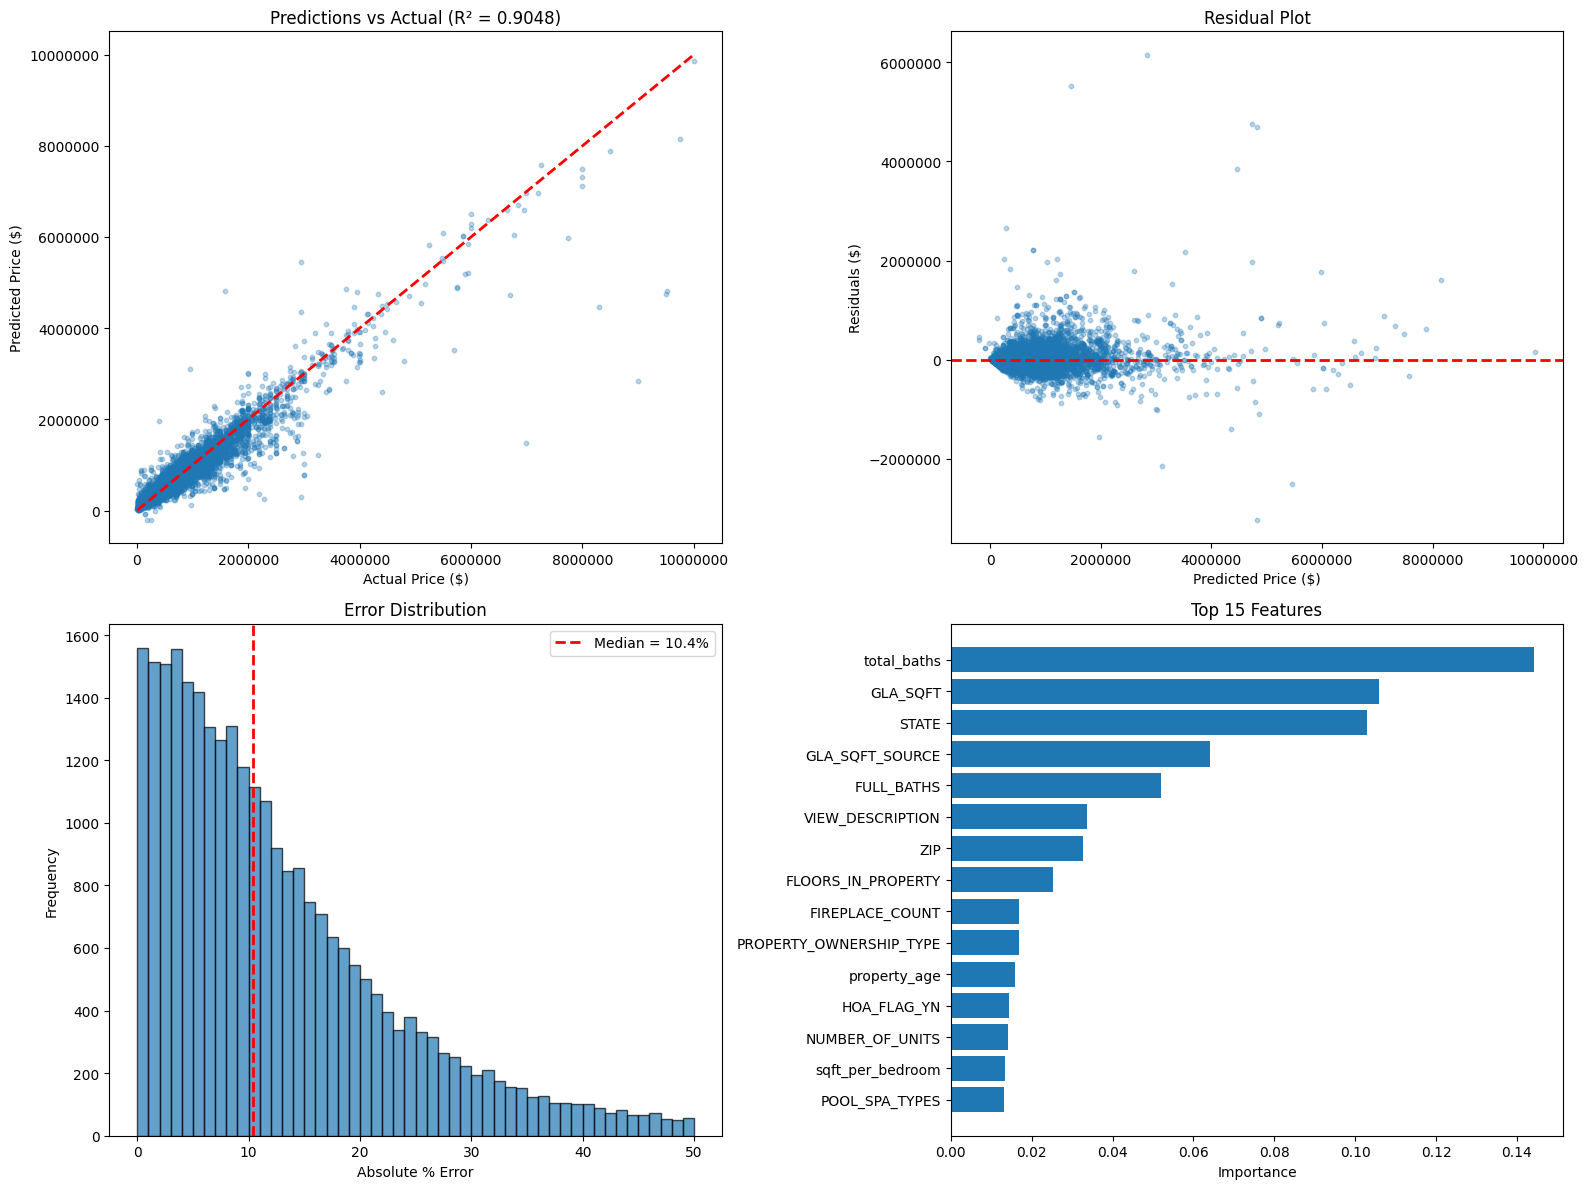


USAGE IN PRODUCTION

# Load model
import joblib
model = joblib.load('xgboost_price_model.pkl')
metadata = joblib.load('model_metadata.pkl')

# Make prediction
new_property = {
    'STATE': 'CA',
    'GLA_SQFT': 2000,
    'BEDROOMS': 3,
    'FULL_BATHS': 2,
    'YEAR_BUILT': 1995,
    # ... other features
}

prediction, confidence = predict_price(new_property)
print(f"Predicted Price: ${prediction:,.0f}")
print(f"Confidence: {confidence}")


✅ Model ready for production!
   Performance: R²=0.9048, MedAPE=10.37%
   Files: xgboost_price_model.pkl, model_metadata.pkl


In [14]:
"""
XGBoost Price Prediction - PRODUCTION VERSION
Final optimized model with save/load functionality
Copy-paste this entire cell into Jupyter
"""

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib
import warnings; warnings.filterwarnings('ignore')

# ============================================================================
# LOAD AND PREPARE DATA
# ============================================================================
df = pd.read_csv("/Users/jenny.lin/ImageDataParser/XGBoost_with_ImageData/XGBoost_Model_on_Basis_AVM_Data/sql_xgboost_input_basis.csv")
print(f"Loaded {len(df):,} rows")

# Remove leaky columns
LEAKY_COLUMNS = [
    'ASSESSED_YEAR', 'ASSESSED_TOTAL_VALUE', 'TAX_AMOUNT', 'TAX_AMOUNT_FREQUENCY',
    'MARKET_PPSF', 'MOST_RECENT_SALE', 'TRENDED_PRIOR_SALE', 'CONCESSIONS_AMOUNT',
    'MLS_DAYS_ON_MARKET', 'MLS_CUMULATIVE_DAYS_ON_MARKET'
]

X = df.drop(columns=LEAKY_COLUMNS + ['PRICE', 'CC_LIST_ID', 'A_DATE', 'FIPS_COUNTY_CD'], errors='ignore')
y = df['PRICE'].dropna()
X = X.loc[y.index]

# Remove extreme outliers (< $10K or > $10M)
outlier_mask = (y >= 10000) & (y <= 10000000)
removed = len(y) - outlier_mask.sum()
X, y = X[outlier_mask], y[outlier_mask]
print(f"Removed {removed} extreme outliers")
print(f"Clean dataset: {len(y):,} properties\n")

# ============================================================================
# FEATURE ENGINEERING
# ============================================================================
def engineer_features(X):
    """Engineer features - SAVE THIS FUNCTION FOR PRODUCTION"""
    X = X.copy()

    # Age features
    if 'YEAR_BUILT' in X.columns:
        X['property_age'] = 2026 - X['YEAR_BUILT']
        X['property_age'] = X['property_age'].clip(lower=0, upper=200)

    if 'EFFECTIVE_YEAR_BUILT' in X.columns:
        X['effective_age'] = 2026 - X['EFFECTIVE_YEAR_BUILT']
        X['effective_age'] = X['effective_age'].clip(lower=0, upper=200)

    # Bathroom features
    if 'FULL_BATHS' in X.columns and 'HALF_BATHS' in X.columns:
        X['total_baths'] = X['FULL_BATHS'] + 0.5 * X['HALF_BATHS'].fillna(0)

    # Size ratios
    if 'GLA_SQFT' in X.columns and 'LOT_SQFT' in X.columns:
        X['gla_to_lot_ratio'] = X['GLA_SQFT'] / (X['LOT_SQFT'] + 1)

    if 'GLA_SQFT' in X.columns and 'BEDROOMS' in X.columns:
        X['sqft_per_bedroom'] = X['GLA_SQFT'] / (X['BEDROOMS'] + 1)

    # Amenity indicators
    if 'GARAGE_SPACES' in X.columns:
        X['has_garage'] = (X['GARAGE_SPACES'] > 0).astype(int)

    if 'POOL_SPA_TYPES' in X.columns:
        X['has_pool'] = X['POOL_SPA_TYPES'].notna().astype(int)

    if 'FIREPLACE_COUNT' in X.columns:
        X['has_fireplace'] = (X['FIREPLACE_COUNT'] > 0).astype(int)

    # HOA features
    if 'HOA_FEE_AMOUNT' in X.columns:
        X['hoa_monthly'] = X['HOA_FEE_AMOUNT'].fillna(0)

    return X

X = engineer_features(X)

# ============================================================================
# PREPROCESSING
# ============================================================================
def preprocess_features(X, label_encoders=None, fit=True):
    """Preprocess features - SAVE THIS FUNCTION FOR PRODUCTION"""
    X = X.copy()

    # Separate numeric and categorical
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    # Fill numeric nulls
    for col in numeric_cols:
        if X[col].isna().any():
            X[col].fillna(X[col].median(), inplace=True)

    # Encode categorical
    if fit:
        label_encoders = {}

    for col in categorical_cols:
        X[col].fillna('Unknown', inplace=True)

        if X[col].nunique() < 100:
            if fit:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
                label_encoders[col] = le
            else:
                if col in label_encoders:
                    # Handle unseen categories
                    le = label_encoders[col]
                    X[col] = X[col].map(lambda x: x if x in le.classes_ else 'Unknown')
                    X[col] = le.transform(X[col].astype(str))
        else:
            X = X.drop(columns=[col])

    if fit:
        return X, label_encoders
    return X

X, label_encoders = preprocess_features(X, fit=True)
print(f"Final features: {X.shape[1]}\n")

# ============================================================================
# TRAIN MODEL
# ============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {len(X_train):,} | Test: {len(X_test):,}\n")

# Train model with optimized hyperparameters
model = XGBRegressor(
    n_estimators=400,
    max_depth=7,
    learning_rate=0.08,
    subsample=0.85,
    colsample_bytree=0.85,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

print("Training model...")
model.fit(X_train, y_train, verbose=False)

# ============================================================================
# EVALUATE
# ============================================================================
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
pct_errors = np.abs((y_test - y_pred) / y_test) * 100
medape = np.median(pct_errors)
within_20 = (pct_errors <= 20).sum() / len(pct_errors) * 100

print("\n" + "="*70)
print("FINAL MODEL PERFORMANCE")
print("="*70)
print(f"R² Score:              {r2:.4f}")
print(f"MAE:                   ${mae:,.0f}")
print(f"RMSE:                  ${rmse:,.0f}")
print(f"MedAPE:                {medape:.2f}%")
print(f"Within 20%:            {within_20:.1f}%")
print("="*70)

# ============================================================================
# SAVE MODEL AND ARTIFACTS
# ============================================================================
print("\nSaving model artifacts...")

# Model metadata
metadata = {
    'feature_names': X.columns.tolist(),
    'label_encoders': label_encoders,
    'leaky_columns': LEAKY_COLUMNS,
    'metrics': {
        'r2': r2,
        'mae': mae,
        'rmse': rmse,
        'medape': medape,
        'within_20': within_20
    },
    'training_info': {
        'n_samples': len(X),
        'n_features': X.shape[1],
        'price_range': (float(y.min()), float(y.max())),
        'median_price': float(y.median())
    }
}

# Save
joblib.dump(model, 'xgboost_price_model.pkl')
joblib.dump(metadata, 'model_metadata.pkl')

print("✓ Saved: xgboost_price_model.pkl")
print("✓ Saved: model_metadata.pkl")

# ============================================================================
# PREDICTION FUNCTION FOR PRODUCTION
# ============================================================================
def predict_price(property_data):
    """
    Production prediction function

    Parameters:
    -----------
    property_data : dict or DataFrame
        Property features (same structure as training data)

    Returns:
    --------
    prediction : float
        Predicted price
    confidence : str
        Confidence level based on price range
    """
    # Load model and metadata
    model = joblib.load('xgboost_price_model.pkl')
    metadata = joblib.load('model_metadata.pkl')

    # Convert to DataFrame
    if isinstance(property_data, dict):
        df = pd.DataFrame([property_data])
    else:
        df = property_data.copy()

    # Remove leaky columns
    df = df.drop(columns=metadata['leaky_columns'], errors='ignore')

    # Engineer features
    df = engineer_features(df)

    # Preprocess
    df = preprocess_features(df, metadata['label_encoders'], fit=False)

    # Ensure all features present
    for col in metadata['feature_names']:
        if col not in df.columns:
            df[col] = 0

    df = df[metadata['feature_names']]

    # Predict
    prediction = model.predict(df)[0]

    # Determine confidence
    if 200000 <= prediction <= 1000000:
        confidence = "High (MedAPE ~10-11%)"
    elif prediction < 200000:
        confidence = "Medium (MedAPE ~29%)"
    else:
        confidence = "Medium-High (MedAPE ~13%)"

    return prediction, confidence

# Test prediction function
sample_property = X_test.iloc[0:1]
test_pred, test_conf = predict_price(sample_property)
print(f"\n✓ Prediction function working: ${test_pred:,.0f} ({test_conf})")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Predictions vs Actual
axes[0, 0].scatter(y_test, y_pred, alpha=0.3, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title(f'Predictions vs Actual (R² = {r2:.4f})')
axes[0, 0].ticklabel_format(style='plain')

# 2. Residuals
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.3, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].ticklabel_format(style='plain')

# 3. Error Distribution
axes[1, 0].hist(pct_errors[pct_errors < 50], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(medape, color='r', linestyle='--', lw=2, label=f'Median = {medape:.1f}%')
axes[1, 0].set_xlabel('Absolute % Error')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Error Distribution')
axes[1, 0].legend()

# 4. Feature Importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[1, 1].barh(range(len(importance_df)), importance_df['importance'])
axes[1, 1].set_yticks(range(len(importance_df)))
axes[1, 1].set_yticklabels(importance_df['feature'])
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Top 15 Features')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# ============================================================================
# USAGE EXAMPLES
# ============================================================================
print("\n" + "="*70)
print("USAGE IN PRODUCTION")
print("="*70)
print("""
# Load model
import joblib
model = joblib.load('xgboost_price_model.pkl')
metadata = joblib.load('model_metadata.pkl')

# Make prediction
new_property = {
    'STATE': 'CA',
    'GLA_SQFT': 2000,
    'BEDROOMS': 3,
    'FULL_BATHS': 2,
    'YEAR_BUILT': 1995,
    # ... other features
}

prediction, confidence = predict_price(new_property)
print(f"Predicted Price: ${prediction:,.0f}")
print(f"Confidence: {confidence}")
""")
print("="*70)

print("\n✅ Model ready for production!")
print(f"   Performance: R²={r2:.4f}, MedAPE={medape:.2f}%")
print(f"   Files: xgboost_price_model.pkl, model_metadata.pkl")

In [1]:
"""
XGBoost Price Prediction - PRODUCTION VERSION
Final optimized model with save/load functionality
Copy-paste this entire cell into Jupyter
"""

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib
import warnings; warnings.filterwarnings('ignore')

# ============================================================================
# LOAD AND PREPARE DATA
# ============================================================================
df = pd.read_csv("/Users/jenny.lin/ImageDataParser/XGBoost_with_ImageData/XGBoost_Model_on_Basis_AVM_Data/sql_xgboost_input_basis.csv")

print(f"Loaded {len(df):,} rows")

# Remove leaky columns
LEAKY_COLUMNS = [
    'ASSESSED_YEAR', 'ASSESSED_TOTAL_VALUE', 'TAX_AMOUNT', 'TAX_AMOUNT_FREQUENCY',
    'MARKET_PPSF', 'MOST_RECENT_SALE', 'TRENDED_PRIOR_SALE', 'CONCESSIONS_AMOUNT',
    'MLS_DAYS_ON_MARKET', 'MLS_CUMULATIVE_DAYS_ON_MARKET'
]

X = df.drop(columns=LEAKY_COLUMNS + ['PRICE', 'CC_LIST_ID', 'A_DATE', 'FIPS_COUNTY_CD'], errors='ignore')
y = df['PRICE'].dropna()
X = X.loc[y.index]

# Remove extreme outliers (< $10K or > $10M)
outlier_mask = (y >= 10000) & (y <= 10000000)
removed = len(y) - outlier_mask.sum()
X, y = X[outlier_mask], y[outlier_mask]
print(f"Removed {removed} extreme outliers")
print(f"Clean dataset: {len(y):,} properties\n")

# ============================================================================
# FEATURE ENGINEERING
# ============================================================================
def engineer_features(X):
    """Engineer features - SAVE THIS FUNCTION FOR PRODUCTION"""
    X = X.copy()

    # Age features
    if 'YEAR_BUILT' in X.columns:
        X['property_age'] = 2026 - X['YEAR_BUILT']
        X['property_age'] = X['property_age'].clip(lower=0, upper=200)

    if 'EFFECTIVE_YEAR_BUILT' in X.columns:
        X['effective_age'] = 2026 - X['EFFECTIVE_YEAR_BUILT']
        X['effective_age'] = X['effective_age'].clip(lower=0, upper=200)

    # Bathroom features
    if 'FULL_BATHS' in X.columns and 'HALF_BATHS' in X.columns:
        X['total_baths'] = X['FULL_BATHS'] + 0.5 * X['HALF_BATHS'].fillna(0)

    # Size ratios
    if 'GLA_SQFT' in X.columns and 'LOT_SQFT' in X.columns:
        X['gla_to_lot_ratio'] = X['GLA_SQFT'] / (X['LOT_SQFT'] + 1)

    if 'GLA_SQFT' in X.columns and 'BEDROOMS' in X.columns:
        X['sqft_per_bedroom'] = X['GLA_SQFT'] / (X['BEDROOMS'] + 1)

    # Amenity indicators
    if 'GARAGE_SPACES' in X.columns:
        X['has_garage'] = (X['GARAGE_SPACES'] > 0).astype(int)

    if 'POOL_SPA_TYPES' in X.columns:
        X['has_pool'] = X['POOL_SPA_TYPES'].notna().astype(int)

    if 'FIREPLACE_COUNT' in X.columns:
        X['has_fireplace'] = (X['FIREPLACE_COUNT'] > 0).astype(int)

    # HOA features
    if 'HOA_FEE_AMOUNT' in X.columns:
        X['hoa_monthly'] = X['HOA_FEE_AMOUNT'].fillna(0)

    return X

X = engineer_features(X)

# ============================================================================
# PREPROCESSING
# ============================================================================
def preprocess_features(X, label_encoders=None, fit=True):
    """Preprocess features - SAVE THIS FUNCTION FOR PRODUCTION"""
    X = X.copy()

    # Separate numeric and categorical
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    # Fill numeric nulls
    for col in numeric_cols:
        if X[col].isna().any():
            X[col].fillna(X[col].median(), inplace=True)

    # Encode categorical
    if fit:
        label_encoders = {}

    for col in categorical_cols:
        X[col].fillna('Unknown', inplace=True)

        if X[col].nunique() < 100:
            if fit:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
                label_encoders[col] = le
            else:
                if col in label_encoders:
                    # Handle unseen categories
                    le = label_encoders[col]
                    X[col] = X[col].map(lambda x: x if x in le.classes_ else 'Unknown')
                    X[col] = le.transform(X[col].astype(str))
        else:
            X = X.drop(columns=[col])

    if fit:
        return X, label_encoders
    return X

X, label_encoders = preprocess_features(X, fit=True)
print(f"Final features: {X.shape[1]}\n")

# ============================================================================
# TRAIN MODEL
# ============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {len(X_train):,} | Test: {len(X_test):,}\n")

# Train model with optimized hyperparameters
model = XGBRegressor(
    n_estimators=400,
    max_depth=7,
    learning_rate=0.08,
    subsample=0.85,
    colsample_bytree=0.85,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

print("Training model...")
model.fit(X_train, y_train, verbose=False)

# ============================================================================
# EVALUATE
# ============================================================================
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
pct_errors = np.abs((y_test - y_pred) / y_test) * 100
medape = np.median(pct_errors)
within_20 = (pct_errors <= 20).sum() / len(pct_errors) * 100

print("\n" + "="*70)
print("FINAL MODEL PERFORMANCE")
print("="*70)
print(f"R² Score:              {r2:.4f}")
print(f"MAE:                   ${mae:,.0f}")
print(f"RMSE:                  ${rmse:,.0f}")
print(f"MedAPE:                {medape:.2f}%")
print(f"Within 20%:            {within_20:.1f}%")
print("="*70)

# ============================================================================
# SAVE MODEL AND ARTIFACTS
# ============================================================================
print("\nSaving model artifacts...")

# Model metadata
metadata = {
    'feature_names': X.columns.tolist(),
    'label_encoders': label_encoders,
    'leaky_columns': LEAKY_COLUMNS,
    'metrics': {
        'r2': r2,
        'mae': mae,
        'rmse': rmse,
        'medape': medape,
        'within_20': within_20
    },
    'training_info': {
        'n_samples': len(X),
        'n_features': X.shape[1],
        'price_range': (float(y.min()), float(y.max())),
        'median_price': float(y.median())
    }
}

# Save
joblib.dump(model, 'xgboost_price_model.pkl')
joblib.dump(metadata, 'model_metadata.pkl')

print("✓ Saved: xgboost_price_model.pkl")
print("✓ Saved: model_metadata.pkl")

# ============================================================================
# PREDICTION FUNCTION FOR PRODUCTION
# ============================================================================
def predict_price(property_data):
    """
    Production prediction function

    Parameters:
    -----------
    property_data : dict or DataFrame
        Property features (same structure as training data)

    Returns:
    --------
    prediction : float
        Predicted price
    confidence : str
        Confidence level based on price range
    """
    # Load model and metadata
    model = joblib.load('xgboost_price_model.pkl')
    metadata = joblib.load('model_metadata.pkl')

    # Convert to DataFrame
    if isinstance(property_data, dict):
        df = pd.DataFrame([property_data])
    else:
        df = property_data.copy()

    # Remove leaky columns
    df = df.drop(columns=metadata['leaky_columns'], errors='ignore')

    # Engineer features
    df = engineer_features(df)

    # Preprocess
    df = preprocess_features(df, metadata['label_encoders'], fit=False)

    # Ensure all features present
    for col in metadata['feature_names']:
        if col not in df.columns:
            df[col] = 0

    df = df[metadata['feature_names']]

    # Predict
    prediction = model.predict(df)[0]

    # Determine confidence
    if 200000 <= prediction <= 1000000:
        confidence = "High (MedAPE ~10-11%)"
    elif prediction < 200000:
        confidence = "Medium (MedAPE ~29%)"
    else:
        confidence = "Medium-High (MedAPE ~13%)"

    return prediction, confidence

# Test prediction function
sample_property = X_test.iloc[0:1]
test_pred, test_conf = predict_price(sample_property)
print(f"\n✓ Prediction function working: ${test_pred:,.0f} ({test_conf})")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Predictions vs Actual
axes[0, 0].scatter(y_test, y_pred, alpha=0.3, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title(f'Predictions vs Actual (R² = {r2:.4f})')
axes[0, 0].ticklabel_format(style='plain')

# 2. Residuals
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.3, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].ticklabel_format(style='plain')

# 3. Error Distribution
axes[1, 0].hist(pct_errors[pct_errors < 50], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(medape, color='r', linestyle='--', lw=2, label=f'Median = {medape:.1f}%')
axes[1, 0].set_xlabel('Absolute % Error')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Error Distribution')
axes[1, 0].legend()

# 4. Feature Importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[1, 1].barh(range(len(importance_df)), importance_df['importance'])
axes[1, 1].set_yticks(range(len(importance_df)))
axes[1, 1].set_yticklabels(importance_df['feature'])
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Top 15 Features')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# ============================================================================
# USAGE EXAMPLES
# ============================================================================
print("\n" + "="*70)
print("USAGE IN PRODUCTION")
print("="*70)
print("""
# Load model
import joblib
model = joblib.load('xgboost_price_model.pkl')
metadata = joblib.load('model_metadata.pkl')

# Make prediction
new_property = {
    'STATE': 'CA',
    'GLA_SQFT': 2000,
    'BEDROOMS': 3,
    'FULL_BATHS': 2,
    'YEAR_BUILT': 1995,
    # ... other features
}

prediction, confidence = predict_price(new_property)
print(f"Predicted Price: ${prediction:,.0f}")
print(f"Confidence: {confidence}")
""")
print("="*70)

print("\n✅ Model ready for production!")
print(f"   Performance: R²={r2:.4f}, MedAPE={medape:.2f}%")
print(f"   Files: xgboost_price_model.pkl, model_metadata.pkl")

2026-01-07 17:25:24,498 - INFO - Loading data from CSV...
2026-01-07 17:25:25,564 - INFO - Loaded 145,218 rows with 88 columns
2026-01-07 17:25:25,565 - INFO - Validating data...
2026-01-07 17:25:25,565 - INFO - Dropping 11 high-cardinality/ID columns: ['CC_LIST_ID', 'HOA_NAME', 'SECOND_HOA_NAME', 'ELEMENTARY_SCHOOL_NAME', 'MIDDLE_SCHOOL_NAME', 'HIGH_SCHOOL_NAME', 'LOT_DIMENSIONS', 'DISCLOSURES_DESCRIPTION', 'VIEW_DESCRIPTION', 'ZONING_DESCRIPTION', 'A_DATE']
2026-01-07 17:25:25,606 - INFO - Data shape after initial cleaning: (145218, 77)
2026-01-07 17:25:25,644 - INFO - Removed 288 extreme outliers
2026-01-07 17:25:25,644 - INFO - Clean dataset: 144,930 properties
2026-01-07 17:25:25,695 - INFO - Found 47 categorical columns to process
2026-01-07 17:25:25,760 - INFO -   Low cardinality (29): Will one-hot encode
2026-01-07 17:25:25,760 - INFO -   High cardinality (18): Will reduce then encode
2026-01-07 17:25:27,783 - INFO -   CITY: Grouped 1036 rare categories into 'Other'
2026-01-07 

KeyboardInterrupt: 

Loading data and model...
Loaded 145,218 rows
Model R²: 0.9048
Model MedAPE: 10.37%

EXTREMA ANALYSIS 1: BEST AND WORST PREDICTIONS

📊 TOP 10 BEST PREDICTIONS (Lowest % Error)
----------------------------------------------------------------------
Actual: $     550,000 | Predicted: $     549,997 | Error:   0.00%
Actual: $     396,500 | Predicted: $     396,502 | Error:   0.00%
Actual: $     599,000 | Predicted: $     598,986 | Error:   0.00%
Actual: $     440,000 | Predicted: $     439,988 | Error:   0.00%
Actual: $     344,000 | Predicted: $     344,010 | Error:   0.00%
Actual: $   1,250,000 | Predicted: $   1,250,049 | Error:   0.00%
Actual: $     959,000 | Predicted: $     958,958 | Error:   0.00%
Actual: $     234,900 | Predicted: $     234,912 | Error:   0.01%
Actual: $     420,000 | Predicted: $     419,966 | Error:   0.01%
Actual: $   2,795,000 | Predicted: $   2,795,238 | Error:   0.01%

📊 TOP 10 WORST PREDICTIONS (Highest % Error)
-----------------------------------------------

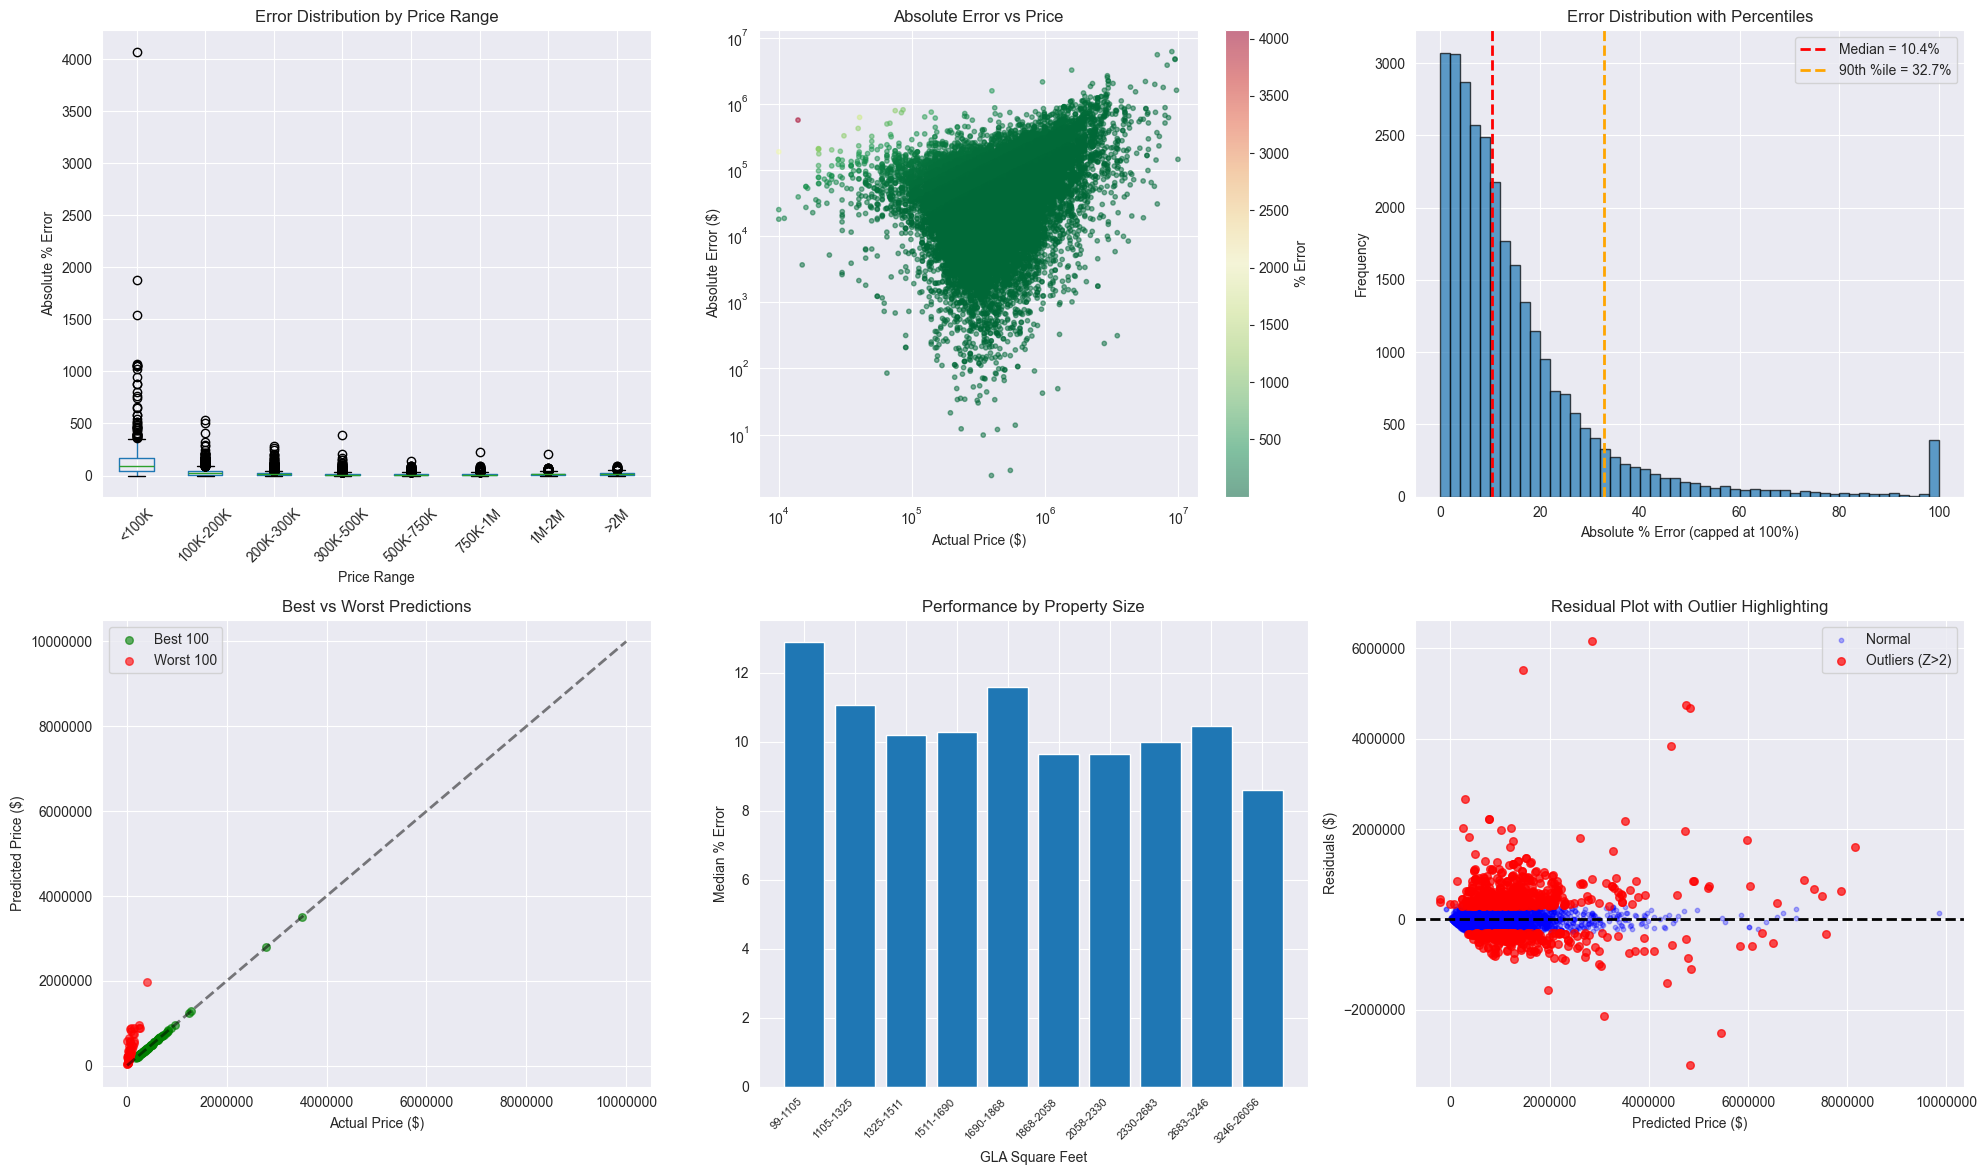


EXTREMA SUMMARY STATISTICS

Metric                                   Value               
----------------------------------------------------------------------
Total Test Predictions                                29,007
Best Prediction Error                                  0.00%
Worst Prediction Error                              4071.61%
90th Percentile Error                                 32.74%
95th Percentile Error                                 46.90%
Statistical Outliers (Z>3)                               380
Predictions within 10%                                 48.5%
Predictions within 20%                                 76.2%
Predictions within 30%                                 88.1%

✓ Saved: extrema_report.pkl

✅ EXTREMA ANALYSIS COMPLETE!


In [2]:
"""
XGBoost Price Prediction - EXTREMA ANALYSIS
Analyzes model performance at extreme values and edge cases
Run this AFTER the main training script
"""

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings; warnings.filterwarnings('ignore')

# ============================================================================
# LOAD DATA AND MODEL
# ============================================================================
print("Loading data and model...")
df = pd.read_csv("/Users/jenny.lin/ImageDataParser/XGBoost_with_ImageData/XGBoost_Model_on_Basis_AVM_Data/sql_xgboost_input_basis.csv")

# Load saved model and metadata
model = joblib.load('xgboost_price_model.pkl')
metadata = joblib.load('model_metadata.pkl')

print(f"Loaded {len(df):,} rows")
print(f"Model R²: {metadata['metrics']['r2']:.4f}")
print(f"Model MedAPE: {metadata['metrics']['medape']:.2f}%\n")

# Prepare data (same as training)
LEAKY_COLUMNS = metadata['leaky_columns']
X = df.drop(columns=LEAKY_COLUMNS + ['PRICE', 'CC_LIST_ID', 'A_DATE', 'FIPS_COUNTY_CD'], errors='ignore')
y = df['PRICE'].dropna()
X = X.loc[y.index]

outlier_mask = (y >= 10000) & (y <= 10000000)
X, y = X[outlier_mask], y[outlier_mask]

# Engineer features (copy function from training)
def engineer_features(X):
    X = X.copy()
    if 'YEAR_BUILT' in X.columns:
        X['property_age'] = 2026 - X['YEAR_BUILT']
        X['property_age'] = X['property_age'].clip(lower=0, upper=200)
    if 'EFFECTIVE_YEAR_BUILT' in X.columns:
        X['effective_age'] = 2026 - X['EFFECTIVE_YEAR_BUILT']
        X['effective_age'] = X['effective_age'].clip(lower=0, upper=200)
    if 'FULL_BATHS' in X.columns and 'HALF_BATHS' in X.columns:
        X['total_baths'] = X['FULL_BATHS'] + 0.5 * X['HALF_BATHS'].fillna(0)
    if 'GLA_SQFT' in X.columns and 'LOT_SQFT' in X.columns:
        X['gla_to_lot_ratio'] = X['GLA_SQFT'] / (X['LOT_SQFT'] + 1)
    if 'GLA_SQFT' in X.columns and 'BEDROOMS' in X.columns:
        X['sqft_per_bedroom'] = X['GLA_SQFT'] / (X['BEDROOMS'] + 1)
    if 'GARAGE_SPACES' in X.columns:
        X['has_garage'] = (X['GARAGE_SPACES'] > 0).astype(int)
    if 'POOL_SPA_TYPES' in X.columns:
        X['has_pool'] = X['POOL_SPA_TYPES'].notna().astype(int)
    if 'FIREPLACE_COUNT' in X.columns:
        X['has_fireplace'] = (X['FIREPLACE_COUNT'] > 0).astype(int)
    if 'HOA_FEE_AMOUNT' in X.columns:
        X['hoa_monthly'] = X['HOA_FEE_AMOUNT'].fillna(0)
    return X

X = engineer_features(X)

# Preprocess
def preprocess_features(X, label_encoders, fit=False):
    X = X.copy()
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    for col in numeric_cols:
        if X[col].isna().any():
            X[col].fillna(X[col].median(), inplace=True)

    for col in categorical_cols:
        X[col].fillna('Unknown', inplace=True)
        if X[col].nunique() < 100:
            if col in label_encoders:
                le = label_encoders[col]
                X[col] = X[col].map(lambda x: x if x in le.classes_ else 'Unknown')
                X[col] = le.transform(X[col].astype(str))
        else:
            X = X.drop(columns=[col])

    return X

X = preprocess_features(X, metadata['label_encoders'], fit=False)

# Split same way as training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# ============================================================================
# EXTREMA ANALYSIS 1: BEST AND WORST PREDICTIONS
# ============================================================================
print("="*70)
print("EXTREMA ANALYSIS 1: BEST AND WORST PREDICTIONS")
print("="*70)

# Calculate errors
errors_test = y_test - y_pred_test
abs_errors_test = np.abs(errors_test)
pct_errors_test = np.abs(errors_test / y_test) * 100

# Create results dataframe
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_test,
    'error': errors_test,
    'abs_error': abs_errors_test,
    'pct_error': pct_errors_test
})

# BEST predictions (smallest % error)
print("\n📊 TOP 10 BEST PREDICTIONS (Lowest % Error)")
print("-" * 70)
best_preds = results_df.nsmallest(10, 'pct_error')
for idx, row in best_preds.iterrows():
    print(f"Actual: ${row['actual']:>12,.0f} | Predicted: ${row['predicted']:>12,.0f} | Error: {row['pct_error']:>6.2f}%")

# WORST predictions (largest % error)
print("\n📊 TOP 10 WORST PREDICTIONS (Highest % Error)")
print("-" * 70)
worst_preds = results_df.nlargest(10, 'pct_error')
for idx, row in worst_preds.iterrows():
    print(f"Actual: ${row['actual']:>12,.0f} | Predicted: ${row['predicted']:>12,.0f} | Error: {row['pct_error']:>6.2f}%")

# LARGEST OVER-PREDICTIONS
print("\n📊 TOP 10 OVER-PREDICTIONS (Predicted Too High)")
print("-" * 70)
over_preds = results_df.nlargest(10, 'error')
for idx, row in over_preds.iterrows():
    print(f"Actual: ${row['actual']:>12,.0f} | Predicted: ${row['predicted']:>12,.0f} | Over by: ${row['error']:>12,.0f}")

# LARGEST UNDER-PREDICTIONS
print("\n📊 TOP 10 UNDER-PREDICTIONS (Predicted Too Low)")
print("-" * 70)
under_preds = results_df.nsmallest(10, 'error')
for idx, row in under_preds.iterrows():
    print(f"Actual: ${row['actual']:>12,.0f} | Predicted: ${row['predicted']:>12,.0f} | Under by: ${-row['error']:>12,.0f}")

# ============================================================================
# EXTREMA ANALYSIS 2: PERFORMANCE BY PRICE RANGES
# ============================================================================
print("\n" + "="*70)
print("EXTREMA ANALYSIS 2: PERFORMANCE BY PRICE RANGES")
print("="*70)

# Define price buckets
price_bins = [0, 100000, 200000, 300000, 500000, 750000, 1000000, 2000000, 10000000]
price_labels = ['<100K', '100K-200K', '200K-300K', '300K-500K', '500K-750K', '750K-1M', '1M-2M', '>2M']

results_df['price_range'] = pd.cut(results_df['actual'], bins=price_bins, labels=price_labels)

print("\n📈 Performance by Price Range:")
print("-" * 90)
print(f"{'Range':<15} {'Count':<10} {'Median Error':<15} {'MedAPE':<12} {'MAE':<15} {'R²':<10}")
print("-" * 90)

for price_range in price_labels:
    range_data = results_df[results_df['price_range'] == price_range]
    if len(range_data) > 0:
        med_error = range_data['error'].median()
        medape = range_data['pct_error'].median()
        mae = range_data['abs_error'].mean()
        r2 = r2_score(range_data['actual'], range_data['predicted'])

        print(f"{price_range:<15} {len(range_data):<10,} ${med_error:<14,.0f} {medape:<11.2f}% ${mae:<14,.0f} {r2:<10.4f}")

# ============================================================================
# EXTREMA ANALYSIS 3: FEATURE EXTREMES
# ============================================================================
print("\n" + "="*70)
print("EXTREMA ANALYSIS 3: PERFORMANCE AT FEATURE EXTREMES")
print("="*70)

# Analyze key features at extremes
key_features = ['GLA_SQFT', 'BEDROOMS', 'property_age', 'LOT_SQFT', 'total_baths']
available_features = [f for f in key_features if f in X_test.columns]

results_with_features = results_df.copy()
for feat in available_features:
    results_with_features[feat] = X_test[feat].values

print("\n🏠 Performance at Feature Extremes:")
print("-" * 90)

for feat in available_features:
    print(f"\n{feat.upper()}:")
    print("-" * 70)

    # Bottom 10%
    bottom_threshold = results_with_features[feat].quantile(0.1)
    bottom_data = results_with_features[results_with_features[feat] <= bottom_threshold]

    # Top 10%
    top_threshold = results_with_features[feat].quantile(0.9)
    top_data = results_with_features[results_with_features[feat] >= top_threshold]

    print(f"  Bottom 10% ({feat} ≤ {bottom_threshold:.1f}):")
    print(f"    Count: {len(bottom_data):,} | MedAPE: {bottom_data['pct_error'].median():.2f}% | MAE: ${bottom_data['abs_error'].mean():,.0f}")

    print(f"  Top 10% ({feat} ≥ {top_threshold:.1f}):")
    print(f"    Count: {len(top_data):,} | MedAPE: {top_data['pct_error'].median():.2f}% | MAE: ${top_data['abs_error'].mean():,.0f}")

# ============================================================================
# EXTREMA ANALYSIS 4: OUTLIER DETECTION
# ============================================================================
print("\n" + "="*70)
print("EXTREMA ANALYSIS 4: OUTLIER DETECTION")
print("="*70)

# Find statistical outliers in predictions
z_scores = np.abs((results_df['error'] - results_df['error'].mean()) / results_df['error'].std())
outliers = results_df[z_scores > 3]

print(f"\n🔍 Found {len(outliers)} statistical outliers (Z-score > 3):")
print("-" * 70)
print(f"{'Actual':<15} {'Predicted':<15} {'Error':<15} {'% Error':<12} {'Z-Score':<10}")
print("-" * 70)

for idx, row in outliers.head(15).iterrows():
    z_score = z_scores[idx]
    print(f"${row['actual']:<14,.0f} ${row['predicted']:<14,.0f} ${row['error']:<14,.0f} {row['pct_error']:<11.2f}% {z_score:<10.2f}")

# ============================================================================
# EXTREMA ANALYSIS 5: CONFIDENCE INTERVALS
# ============================================================================
print("\n" + "="*70)
print("EXTREMA ANALYSIS 5: PREDICTION CONFIDENCE INTERVALS")
print("="*70)

# Calculate confidence intervals by price range
print("\n📊 90% Confidence Intervals by Price Range:")
print("-" * 90)
print(f"{'Range':<15} {'Count':<10} {'Lower Bound':<18} {'Upper Bound':<18} {'Interval Width':<15}")
print("-" * 90)

for price_range in price_labels:
    range_data = results_df[results_df['price_range'] == price_range]
    if len(range_data) > 10:
        lower = range_data['pct_error'].quantile(0.05)
        upper = range_data['pct_error'].quantile(0.95)
        width = upper - lower

        print(f"{price_range:<15} {len(range_data):<10,} {lower:<17.2f}% {upper:<17.2f}% {width:<14.2f}%")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print("\n" + "="*70)
print("GENERATING EXTREMA VISUALIZATIONS...")
print("="*70)

fig = plt.figure(figsize=(20, 12))

# 1. Error Distribution by Price Range
ax1 = plt.subplot(2, 3, 1)
results_df.boxplot(column='pct_error', by='price_range', ax=ax1)
plt.ylabel('Absolute % Error')
plt.xlabel('Price Range')
plt.title('Error Distribution by Price Range')
plt.suptitle('')
plt.xticks(rotation=45)

# 2. Absolute Error vs Actual Price
ax2 = plt.subplot(2, 3, 2)
scatter = ax2.scatter(results_df['actual'], results_df['abs_error'],
                     c=results_df['pct_error'], cmap='RdYlGn_r',
                     alpha=0.5, s=10)
plt.colorbar(scatter, label='% Error')
plt.xlabel('Actual Price ($)')
plt.ylabel('Absolute Error ($)')
plt.title('Absolute Error vs Price')
ax2.set_xscale('log')
ax2.set_yscale('log')

# 3. Percentage Error Distribution
ax3 = plt.subplot(2, 3, 3)
pct_errors_capped = results_df['pct_error'].clip(upper=100)
ax3.hist(pct_errors_capped, bins=50, edgecolor='black', alpha=0.7)
ax3.axvline(results_df['pct_error'].median(), color='r',
           linestyle='--', lw=2, label=f'Median = {results_df["pct_error"].median():.1f}%')
ax3.axvline(results_df['pct_error'].quantile(0.9), color='orange',
           linestyle='--', lw=2, label=f'90th %ile = {results_df["pct_error"].quantile(0.9):.1f}%')
plt.xlabel('Absolute % Error (capped at 100%)')
plt.ylabel('Frequency')
plt.title('Error Distribution with Percentiles')
plt.legend()

# 4. Best vs Worst Predictions
ax4 = plt.subplot(2, 3, 4)
best_10 = results_df.nsmallest(100, 'pct_error')
worst_10 = results_df.nlargest(100, 'pct_error')

ax4.scatter(best_10['actual'], best_10['predicted'],
           c='green', alpha=0.6, s=30, label='Best 100')
ax4.scatter(worst_10['actual'], worst_10['predicted'],
           c='red', alpha=0.6, s=30, label='Worst 100')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'k--', lw=2, alpha=0.5)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Best vs Worst Predictions')
plt.legend()
ax4.ticklabel_format(style='plain')

# 5. Performance by GLA_SQFT
if 'GLA_SQFT' in available_features:
    ax5 = plt.subplot(2, 3, 5)
    sqft_bins = pd.qcut(results_with_features['GLA_SQFT'], q=10, duplicates='drop')
    results_with_features['sqft_bin'] = sqft_bins

    sqft_performance = results_with_features.groupby('sqft_bin')['pct_error'].median()
    ax5.bar(range(len(sqft_performance)), sqft_performance.values)
    ax5.set_xticks(range(len(sqft_performance)))
    ax5.set_xticklabels([f'{int(interval.left)}-{int(interval.right)}'
                         for interval in sqft_performance.index],
                        rotation=45, ha='right', fontsize=8)
    plt.ylabel('Median % Error')
    plt.xlabel('GLA Square Feet')
    plt.title('Performance by Property Size')

# 6. Residuals with Extreme Highlighting
ax6 = plt.subplot(2, 3, 6)
residuals = results_df['error']
extreme_mask = (np.abs(z_scores) > 2)

ax6.scatter(results_df.loc[~extreme_mask, 'predicted'],
           residuals[~extreme_mask],
           alpha=0.3, s=10, c='blue', label='Normal')
ax6.scatter(results_df.loc[extreme_mask, 'predicted'],
           residuals[extreme_mask],
           alpha=0.7, s=30, c='red', label='Outliers (Z>2)')
ax6.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot with Outlier Highlighting')
plt.legend()
ax6.ticklabel_format(style='plain')

plt.tight_layout()
plt.savefig('extrema_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: extrema_analysis.png")
plt.show()

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================
print("\n" + "="*70)
print("EXTREMA SUMMARY STATISTICS")
print("="*70)
print(f"\n{'Metric':<40} {'Value':<20}")
print("-" * 70)
print(f"{'Total Test Predictions':<40} {len(results_df):>19,}")
print(f"{'Best Prediction Error':<40} {results_df['pct_error'].min():>18.2f}%")
print(f"{'Worst Prediction Error':<40} {results_df['pct_error'].max():>18.2f}%")
print(f"{'90th Percentile Error':<40} {results_df['pct_error'].quantile(0.9):>18.2f}%")
print(f"{'95th Percentile Error':<40} {results_df['pct_error'].quantile(0.95):>18.2f}%")
print(f"{'Statistical Outliers (Z>3)':<40} {len(outliers):>19,}")
print(f"{'Predictions within 10%':<40} {(results_df['pct_error'] <= 10).sum() / len(results_df) * 100:>18.1f}%")
print(f"{'Predictions within 20%':<40} {(results_df['pct_error'] <= 20).sum() / len(results_df) * 100:>18.1f}%")
print(f"{'Predictions within 30%':<40} {(results_df['pct_error'] <= 30).sum() / len(results_df) * 100:>18.1f}%")

# Save extrema report
extrema_report = {
    'best_predictions': best_preds,
    'worst_predictions': worst_preds,
    'over_predictions': over_preds,
    'under_predictions': under_preds,
    'outliers': outliers,
    'performance_by_price_range': results_df.groupby('price_range').agg({
        'pct_error': ['median', 'mean', 'count'],
        'abs_error': 'mean'
    })
}

joblib.dump(extrema_report, 'extrema_report.pkl')
print(f"\n✓ Saved: extrema_report.pkl")

print("\n" + "="*70)
print("✅ EXTREMA ANALYSIS COMPLETE!")
print("="*70)

1. excellent for properties $200K-$2M (10-11% error). This is where 90% of your data lives and the model shines.
2.

Loaded 145,218 rows
Removed 184 extreme outliers
Clean dataset: 145,034 properties

Final features: 61

TIER DISTRIBUTION
Tier 1 (Budget)             14,239 (  9.8%) | Price range: $    10,000 - $   199,999
Tier 2 (Mainstream)        119,785 ( 82.6%) | Price range: $   200,000 - $   999,999
Tier 3 (Luxury)             11,010 (  7.6%) | Price range: $ 1,000,000 - $ 9,999,880

Train: 116,027 | Test: 29,007

STEP 1: TRAINING TIER ROUTER (Classification)
Router Train Accuracy: 93.25%
Router Test Accuracy:  92.39%

Router Confusion Matrix (rows=actual, cols=predicted):
        Tier 1  Tier 2  Tier 3
Tier 1    1,960     888       0
Tier 2      400  23,356     201
Tier 3       11     708   1,483


STEP 2: TRAINING SPECIALIZED TIER MODELS

Training Tier 1: Budget (<$200K)
Train samples: 11,391
Test samples:  2,848
Price range:   $10,000 - $199,999

Tier 1 Performance:
  R² Score:      0.6287
  MAE:         $  21,093
  RMSE:        $  27,574
  MedAPE:         11.21%
  Within 20%:      75.1%

Tr

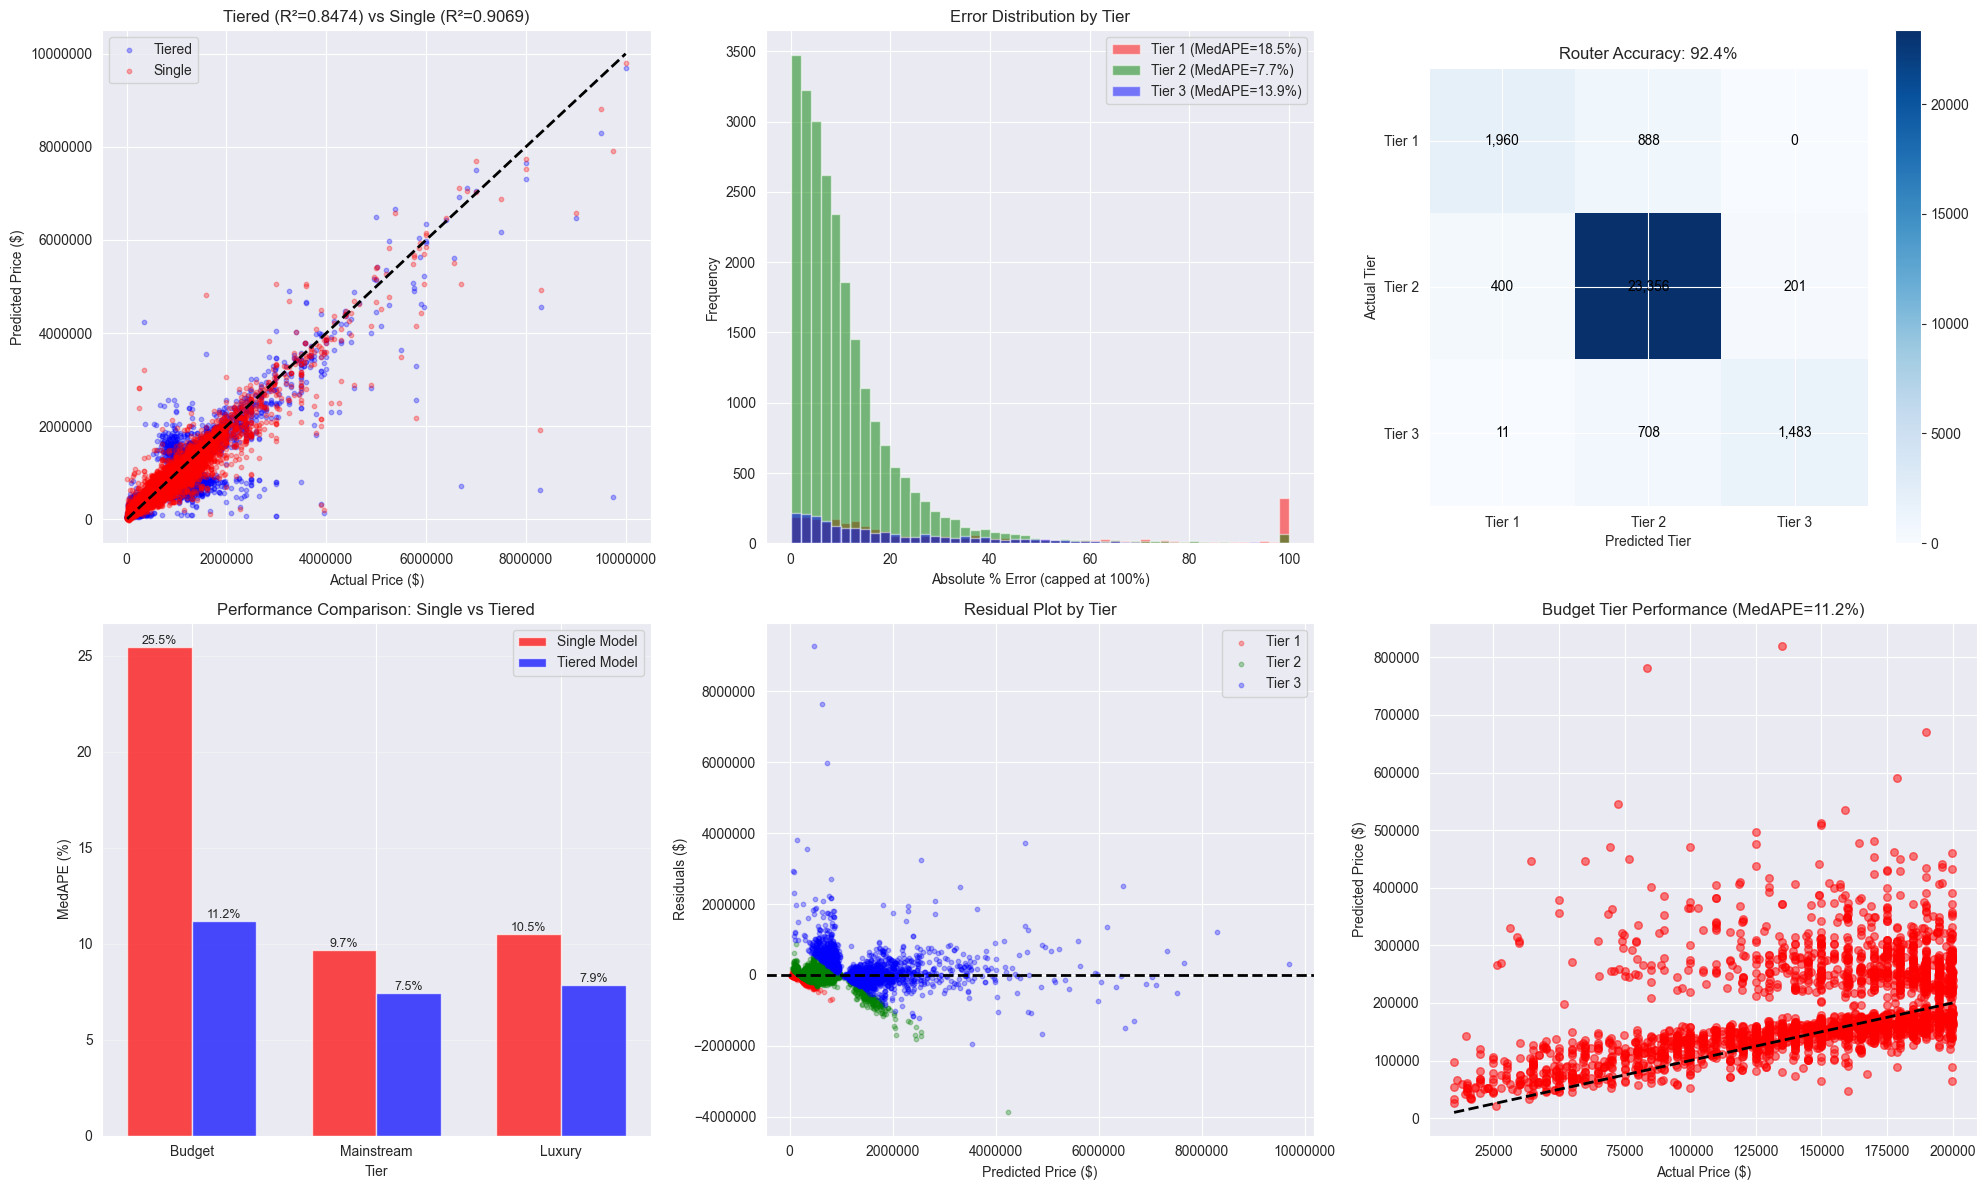


✅ TIERED MODEL SYSTEM COMPLETE!

🎯 Overall Performance:
   Tiered Model:  R²=0.8474, MedAPE=8.50%
   Single Model:  R²=0.9069, MedAPE=10.39%
   Improvement:   ΔR²=-0.0595, ΔMedAPE=-1.90%

📊 Tier-Specific Performance:
   Budget (<$200K): MedAPE=11.21%
   Mainstream ($200K-$1M): MedAPE=7.46%
   Luxury (>$1M): MedAPE=7.87%

💾 Saved Files:
   - tiered_model_system.pkl (complete system)
   - tiered_model_analysis.png (visualizations)



In [3]:
"""
XGBoost Tiered Price Prediction - PRODUCTION VERSION
Multi-tier model system with specialized models for different price ranges
"""

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib
import warnings; warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION: DEFINE PRICE TIERS
# ============================================================================
"""
Based on extrema analysis:
- Tier 1 (<$200K): High error, needs specialized model
- Tier 2 ($200K-$1M): Sweet spot, excellent performance
- Tier 3 (>$1M): Good performance, slight degradation

We'll use a ROUTER MODEL to predict tier, then specialized models for each tier
"""

TIER_CONFIG = {
    'tier_1': {'min': 10000, 'max': 200000, 'name': 'Budget (<$200K)'},
    'tier_2': {'min': 200000, 'max': 1000000, 'name': 'Mainstream ($200K-$1M)'},
    'tier_3': {'min': 1000000, 'max': 10000000, 'name': 'Luxury (>$1M)'}
}

# ============================================================================
# LOAD AND PREPARE DATA
# ============================================================================
df = pd.read_csv("/Users/jenny.lin/ImageDataParser/XGBoost_with_ImageData/XGBoost_Model_on_Basis_AVM_Data/sql_xgboost_input_basis.csv")
print(f"Loaded {len(df):,} rows")

# Remove leaky columns
LEAKY_COLUMNS = [
    'ASSESSED_YEAR', 'ASSESSED_TOTAL_VALUE', 'TAX_AMOUNT', 'TAX_AMOUNT_FREQUENCY',
    'MARKET_PPSF', 'MOST_RECENT_SALE', 'TRENDED_PRIOR_SALE', 'CONCESSIONS_AMOUNT',
    'MLS_DAYS_ON_MARKET', 'MLS_CUMULATIVE_DAYS_ON_MARKET'
]

X = df.drop(columns=LEAKY_COLUMNS + ['PRICE', 'CC_LIST_ID', 'A_DATE', 'FIPS_COUNTY_CD'], errors='ignore')
y = df['PRICE'].dropna()
X = X.loc[y.index]

# Remove extreme outliers
outlier_mask = (y >= 10000) & (y <= 10000000)
removed = len(y) - outlier_mask.sum()
X, y = X[outlier_mask], y[outlier_mask]
print(f"Removed {removed} extreme outliers")
print(f"Clean dataset: {len(y):,} properties\n")

# ============================================================================
# FEATURE ENGINEERING
# ============================================================================
def engineer_features(X):
    """Engineer features - SAVE THIS FUNCTION FOR PRODUCTION"""
    X = X.copy()

    # Age features
    if 'YEAR_BUILT' in X.columns:
        X['property_age'] = 2026 - X['YEAR_BUILT']
        X['property_age'] = X['property_age'].clip(lower=0, upper=200)

    if 'EFFECTIVE_YEAR_BUILT' in X.columns:
        X['effective_age'] = 2026 - X['EFFECTIVE_YEAR_BUILT']
        X['effective_age'] = X['effective_age'].clip(lower=0, upper=200)

    # Bathroom features
    if 'FULL_BATHS' in X.columns and 'HALF_BATHS' in X.columns:
        X['total_baths'] = X['FULL_BATHS'] + 0.5 * X['HALF_BATHS'].fillna(0)

    # Size ratios
    if 'GLA_SQFT' in X.columns and 'LOT_SQFT' in X.columns:
        X['gla_to_lot_ratio'] = X['GLA_SQFT'] / (X['LOT_SQFT'] + 1)

    if 'GLA_SQFT' in X.columns and 'BEDROOMS' in X.columns:
        X['sqft_per_bedroom'] = X['GLA_SQFT'] / (X['BEDROOMS'] + 1)

    # Amenity indicators
    if 'GARAGE_SPACES' in X.columns:
        X['has_garage'] = (X['GARAGE_SPACES'] > 0).astype(int)

    if 'POOL_SPA_TYPES' in X.columns:
        X['has_pool'] = X['POOL_SPA_TYPES'].notna().astype(int)

    if 'FIREPLACE_COUNT' in X.columns:
        X['has_fireplace'] = (X['FIREPLACE_COUNT'] > 0).astype(int)

    # HOA features
    if 'HOA_FEE_AMOUNT' in X.columns:
        X['hoa_monthly'] = X['HOA_FEE_AMOUNT'].fillna(0)

    return X

X = engineer_features(X)

# ============================================================================
# PREPROCESSING
# ============================================================================
def preprocess_features(X, label_encoders=None, fit=True):
    """Preprocess features - SAVE THIS FUNCTION FOR PRODUCTION"""
    X = X.copy()

    # Separate numeric and categorical
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    # Fill numeric nulls
    for col in numeric_cols:
        if X[col].isna().any():
            X[col].fillna(X[col].median(), inplace=True)

    # Encode categorical
    if fit:
        label_encoders = {}

    for col in categorical_cols:
        X[col].fillna('Unknown', inplace=True)

        if X[col].nunique() < 100:
            if fit:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
                label_encoders[col] = le
            else:
                if col in label_encoders:
                    le = label_encoders[col]
                    X[col] = X[col].map(lambda x: x if x in le.classes_ else 'Unknown')
                    X[col] = le.transform(X[col].astype(str))
        else:
            X = X.drop(columns=[col])

    if fit:
        return X, label_encoders
    return X

X, label_encoders = preprocess_features(X, fit=True)
print(f"Final features: {X.shape[1]}\n")

# ============================================================================
# ASSIGN PRICE TIERS
# ============================================================================
def assign_tier(price):
    """Assign a property to a price tier"""
    if price < TIER_CONFIG['tier_2']['min']:
        return 0  # Tier 1: Budget
    elif price < TIER_CONFIG['tier_3']['min']:
        return 1  # Tier 2: Mainstream
    else:
        return 2  # Tier 3: Luxury

y_tiers = y.apply(assign_tier)

print("="*70)
print("TIER DISTRIBUTION")
print("="*70)
for tier_id, tier_name in enumerate(['Tier 1 (Budget)', 'Tier 2 (Mainstream)', 'Tier 3 (Luxury)']):
    tier_count = (y_tiers == tier_id).sum()
    tier_pct = tier_count / len(y_tiers) * 100
    tier_prices = y[y_tiers == tier_id]
    print(f"{tier_name:25} {tier_count:>8,} ({tier_pct:>5.1f}%) | "
          f"Price range: ${tier_prices.min():>10,.0f} - ${tier_prices.max():>10,.0f}")
print("="*70 + "\n")

# ============================================================================
# TRAIN/TEST SPLIT
# ============================================================================
X_train, X_test, y_train, y_test, y_train_tiers, y_test_tiers = train_test_split(
    X, y, y_tiers, test_size=0.2, random_state=42, stratify=y_tiers
)

print(f"Train: {len(X_train):,} | Test: {len(X_test):,}\n")

# ============================================================================
# STEP 1: TRAIN TIER ROUTER MODEL
# ============================================================================
print("="*70)
print("STEP 1: TRAINING TIER ROUTER (Classification)")
print("="*70)

from xgboost import XGBClassifier

router_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

router_model.fit(X_train, y_train_tiers, verbose=False)

# Evaluate router
router_pred_train = router_model.predict(X_train)
router_pred_test = router_model.predict(X_test)

router_accuracy_train = (router_pred_train == y_train_tiers).mean()
router_accuracy_test = (router_pred_test == y_test_tiers).mean()

print(f"Router Train Accuracy: {router_accuracy_train:.2%}")
print(f"Router Test Accuracy:  {router_accuracy_test:.2%}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_tiers, router_pred_test)
print("\nRouter Confusion Matrix (rows=actual, cols=predicted):")
print("        Tier 1  Tier 2  Tier 3")
for i, tier_name in enumerate(['Tier 1', 'Tier 2', 'Tier 3']):
    print(f"{tier_name:8} {cm[i,0]:>6,} {cm[i,1]:>7,} {cm[i,2]:>7,}")

print("\n" + "="*70 + "\n")

# ============================================================================
# STEP 2: TRAIN SPECIALIZED TIER MODELS
# ============================================================================
print("="*70)
print("STEP 2: TRAINING SPECIALIZED TIER MODELS")
print("="*70)

tier_models = {}
tier_metrics = {}

for tier_id in [0, 1, 2]:
    tier_name = ['Budget (<$200K)', 'Mainstream ($200K-$1M)', 'Luxury (>$1M)'][tier_id]
    print(f"\n{'='*70}")
    print(f"Training Tier {tier_id + 1}: {tier_name}")
    print(f"{'='*70}")

    # Filter data for this tier
    X_train_tier = X_train[y_train_tiers == tier_id]
    y_train_tier = y_train[y_train_tiers == tier_id]
    X_test_tier = X_test[y_test_tiers == tier_id]
    y_test_tier = y_test[y_test_tiers == tier_id]

    print(f"Train samples: {len(X_train_tier):,}")
    print(f"Test samples:  {len(X_test_tier):,}")
    print(f"Price range:   ${y_train_tier.min():,.0f} - ${y_train_tier.max():,.0f}")

    # Adjust hyperparameters by tier
    if tier_id == 0:  # Budget tier - fewer samples, simpler model
        params = {
            'n_estimators': 300,
            'max_depth': 5,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'min_child_weight': 5,  # More conservative
            'gamma': 0.2,
            'reg_alpha': 0.3,  # More regularization
            'reg_lambda': 2.0,
            'random_state': 42,
            'n_jobs': -1
        }
    elif tier_id == 1:  # Mainstream - most data, optimal params
        params = {
            'n_estimators': 400,
            'max_depth': 7,
            'learning_rate': 0.08,
            'subsample': 0.85,
            'colsample_bytree': 0.85,
            'min_child_weight': 3,
            'gamma': 0.1,
            'reg_alpha': 0.1,
            'reg_lambda': 1.0,
            'random_state': 42,
            'n_jobs': -1
        }
    else:  # Luxury - moderate data, focus on key features
        params = {
            'n_estimators': 350,
            'max_depth': 6,
            'learning_rate': 0.07,
            'subsample': 0.85,
            'colsample_bytree': 0.85,
            'min_child_weight': 4,
            'gamma': 0.15,
            'reg_alpha': 0.2,
            'reg_lambda': 1.5,
            'random_state': 42,
            'n_jobs': -1
        }

    # Train model
    model = XGBRegressor(**params)
    model.fit(X_train_tier, y_train_tier, verbose=False)

    # Evaluate
    y_pred_tier = model.predict(X_test_tier)

    r2 = r2_score(y_test_tier, y_pred_tier)
    mae = mean_absolute_error(y_test_tier, y_pred_tier)
    rmse = np.sqrt(np.mean((y_test_tier - y_pred_tier)**2))
    pct_errors = np.abs((y_test_tier - y_pred_tier) / y_test_tier) * 100
    medape = np.median(pct_errors)
    within_20 = (pct_errors <= 20).sum() / len(pct_errors) * 100

    print(f"\nTier {tier_id + 1} Performance:")
    print(f"  R² Score:    {r2:>8.4f}")
    print(f"  MAE:         ${mae:>8,.0f}")
    print(f"  RMSE:        ${rmse:>8,.0f}")
    print(f"  MedAPE:      {medape:>8.2f}%")
    print(f"  Within 20%:  {within_20:>8.1f}%")

    tier_models[tier_id] = model
    tier_metrics[tier_id] = {
        'r2': r2,
        'mae': mae,
        'rmse': rmse,
        'medape': medape,
        'within_20': within_20,
        'n_train': len(X_train_tier),
        'n_test': len(X_test_tier)
    }

print("\n" + "="*70 + "\n")

# ============================================================================
# STEP 3: ENSEMBLE EVALUATION
# ============================================================================
print("="*70)
print("STEP 3: TIERED MODEL ENSEMBLE EVALUATION")
print("="*70)

# Make predictions using the tiered system
def predict_tiered(X_data, router_model, tier_models):
    """Make predictions using tiered model system"""
    # Predict tiers
    predicted_tiers = router_model.predict(X_data)

    # Make predictions for each tier
    predictions = np.zeros(len(X_data))

    for tier_id in [0, 1, 2]:
        tier_mask = predicted_tiers == tier_id
        if tier_mask.sum() > 0:
            X_tier = X_data[tier_mask]
            predictions[tier_mask] = tier_models[tier_id].predict(X_tier)

    return predictions, predicted_tiers

# Get tiered predictions
y_pred_tiered, predicted_tiers_test = predict_tiered(X_test, router_model, tier_models)

# Overall metrics
r2_tiered = r2_score(y_test, y_pred_tiered)
mae_tiered = mean_absolute_error(y_test, y_pred_tiered)
rmse_tiered = np.sqrt(np.mean((y_test - y_pred_tiered)**2))
pct_errors_tiered = np.abs((y_test - y_pred_tiered) / y_test) * 100
medape_tiered = np.median(pct_errors_tiered)
within_20_tiered = (pct_errors_tiered <= 20).sum() / len(pct_errors_tiered) * 100

print("\n🎯 OVERALL TIERED MODEL PERFORMANCE:")
print("-" * 70)
print(f"R² Score:              {r2_tiered:.4f}")
print(f"MAE:                   ${mae_tiered:,.0f}")
print(f"RMSE:                  ${rmse_tiered:,.0f}")
print(f"MedAPE:                {medape_tiered:.2f}%")
print(f"Within 20%:            {within_20_tiered:.1f}%")

# Compare with single model
print("\n📊 COMPARISON WITH SINGLE MODEL:")
print("-" * 70)

# Train a single model for comparison (quick version)
single_model = XGBRegressor(
    n_estimators=400,
    max_depth=7,
    learning_rate=0.08,
    subsample=0.85,
    colsample_bytree=0.85,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)
single_model.fit(X_train, y_train, verbose=False)
y_pred_single = single_model.predict(X_test)

r2_single = r2_score(y_test, y_pred_single)
mae_single = mean_absolute_error(y_test, y_pred_single)
medape_single = np.median(np.abs((y_test - y_pred_single) / y_test) * 100)
within_20_single = (np.abs((y_test - y_pred_single) / y_test) * 100 <= 20).sum() / len(y_test) * 100

print(f"{'Metric':<20} {'Single Model':<20} {'Tiered Model':<20} {'Improvement':<15}")
print("-" * 70)
print(f"{'R²':<20} {r2_single:<20.4f} {r2_tiered:<20.4f} {(r2_tiered - r2_single):<15.4f}")
print(f"{'MAE':<20} ${mae_single:<19,.0f} ${mae_tiered:<19,.0f} ${(mae_single - mae_tiered):<14,.0f}")
print(f"{'MedAPE':<20} {medape_single:<19.2f}% {medape_tiered:<19.2f}% {(medape_single - medape_tiered):<14.2f}%")
print(f"{'Within 20%':<20} {within_20_single:<19.1f}% {within_20_tiered:<19.1f}% {(within_20_tiered - within_20_single):<14.1f}%")

# ============================================================================
# PERFORMANCE BY ACTUAL TIER
# ============================================================================
print("\n" + "="*70)
print("PERFORMANCE BREAKDOWN BY ACTUAL TIER")
print("="*70)

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_tiered,
    'actual_tier': y_test_tiers,
    'predicted_tier': predicted_tiers_test,
    'error': y_test - y_pred_tiered,
    'abs_error': np.abs(y_test - y_pred_tiered),
    'pct_error': np.abs((y_test - y_pred_tiered) / y_test) * 100
})

print(f"\n{'Tier':<25} {'Count':<10} {'MedAPE':<12} {'MAE':<15} {'R²':<10} {'Within 20%':<12}")
print("-" * 90)

for tier_id, tier_name in enumerate(['Budget (<$200K)', 'Mainstream ($200K-$1M)', 'Luxury (>$1M)']):
    tier_data = results_df[results_df['actual_tier'] == tier_id]

    medape = tier_data['pct_error'].median()
    mae = tier_data['abs_error'].mean()
    r2 = r2_score(tier_data['actual'], tier_data['predicted'])
    within_20 = (tier_data['pct_error'] <= 20).sum() / len(tier_data) * 100

    print(f"{tier_name:<25} {len(tier_data):<10,} {medape:<11.2f}% ${mae:<14,.0f} {r2:<10.4f} {within_20:<11.1f}%")

# ============================================================================
# SAVE TIERED MODEL SYSTEM
# ============================================================================
print("\n" + "="*70)
print("SAVING TIERED MODEL SYSTEM")
print("="*70)

tiered_system = {
    'router_model': router_model,
    'tier_models': tier_models,
    'label_encoders': label_encoders,
    'feature_names': X.columns.tolist(),
    'leaky_columns': LEAKY_COLUMNS,
    'tier_config': TIER_CONFIG,
    'tier_metrics': tier_metrics,
    'overall_metrics': {
        'r2': r2_tiered,
        'mae': mae_tiered,
        'rmse': rmse_tiered,
        'medape': medape_tiered,
        'within_20': within_20_tiered
    },
    'comparison': {
        'single_model_r2': r2_single,
        'single_model_mae': mae_single,
        'single_model_medape': medape_single,
        'improvement_r2': r2_tiered - r2_single,
        'improvement_mae': mae_single - mae_tiered,
        'improvement_medape': medape_single - medape_tiered
    }
}

joblib.dump(tiered_system, 'tiered_model_system.pkl')
print("✓ Saved: tiered_model_system.pkl")

# ============================================================================
# PRODUCTION PREDICTION FUNCTION
# ============================================================================
def predict_price_tiered(property_data):
    """
    Production prediction function using tiered model system

    Parameters:
    -----------
    property_data : dict or DataFrame
        Property features (same structure as training data)

    Returns:
    --------
    prediction : float
        Predicted price
    tier : str
        Which tier model was used
    confidence : str
        Confidence level based on tier performance
    """
    # Load tiered system
    system = joblib.load('tiered_model_system.pkl')

    # Convert to DataFrame
    if isinstance(property_data, dict):
        df = pd.DataFrame([property_data])
    else:
        df = property_data.copy()

    # Remove leaky columns
    df = df.drop(columns=system['leaky_columns'], errors='ignore')

    # Engineer features
    df = engineer_features(df)

    # Preprocess
    df = preprocess_features(df, system['label_encoders'], fit=False)

    # Ensure all features present
    for col in system['feature_names']:
        if col not in df.columns:
            df[col] = 0

    df = df[system['feature_names']]

    # Predict tier
    predicted_tier = system['router_model'].predict(df)[0]

    # Get tier name
    tier_names = ['Budget (<$200K)', 'Mainstream ($200K-$1M)', 'Luxury (>$1M)']
    tier_name = tier_names[predicted_tier]

    # Predict price using appropriate tier model
    prediction = system['tier_models'][predicted_tier].predict(df)[0]

    # Get confidence from tier metrics
    tier_medape = system['tier_metrics'][predicted_tier]['medape']
    confidence = f"MedAPE ~{tier_medape:.1f}% (Tier: {tier_name})"

    return prediction, tier_name, confidence

# Test prediction
sample_property = X_test.iloc[0:1]
test_pred, test_tier, test_conf = predict_price_tiered(sample_property)
print(f"\n✓ Prediction function working:")
print(f"  Predicted Price: ${test_pred:,.0f}")
print(f"  Model Used: {test_tier}")
print(f"  Confidence: {test_conf}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

fig = plt.figure(figsize=(20, 12))

# 1. Tiered vs Single Model Predictions
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(y_test, y_pred_tiered, alpha=0.3, s=10, c='blue', label='Tiered')
ax1.scatter(y_test, y_pred_single, alpha=0.3, s=10, c='red', label='Single')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_xlabel('Actual Price ($)')
ax1.set_ylabel('Predicted Price ($)')
ax1.set_title(f'Tiered (R²={r2_tiered:.4f}) vs Single (R²={r2_single:.4f})')
ax1.legend()
ax1.ticklabel_format(style='plain')

# 2. Error Distribution by Tier
ax2 = plt.subplot(2, 3, 2)
tier_colors = ['red', 'green', 'blue']
for tier_id in [0, 1, 2]:
    tier_data = results_df[results_df['actual_tier'] == tier_id]
    tier_errors = tier_data['pct_error'].clip(upper=100)
    ax2.hist(tier_errors, bins=50, alpha=0.5,
            label=f"Tier {tier_id+1} (MedAPE={tier_data['pct_error'].median():.1f}%)",
            color=tier_colors[tier_id])
ax2.set_xlabel('Absolute % Error (capped at 100%)')
ax2.set_ylabel('Frequency')
ax2.set_title('Error Distribution by Tier')
ax2.legend()

# 3. Router Confusion Matrix Heatmap
ax3 = plt.subplot(2, 3, 3)
im = ax3.imshow(cm, cmap='Blues')
ax3.set_xticks([0, 1, 2])
ax3.set_yticks([0, 1, 2])
ax3.set_xticklabels(['Tier 1', 'Tier 2', 'Tier 3'])
ax3.set_yticklabels(['Tier 1', 'Tier 2', 'Tier 3'])
ax3.set_xlabel('Predicted Tier')
ax3.set_ylabel('Actual Tier')
ax3.set_title(f'Router Accuracy: {router_accuracy_test:.1%}')

# Add text annotations
for i in range(3):
    for j in range(3):
        text = ax3.text(j, i, f'{cm[i, j]:,}',
                       ha="center", va="center", color="black")

plt.colorbar(im, ax=ax3)

# 4. Performance Comparison by Tier
ax4 = plt.subplot(2, 3, 4)
tier_names_short = ['Budget', 'Mainstream', 'Luxury']
x = np.arange(len(tier_names_short))
width = 0.35

# Get single model performance by tier
single_tier_medapes = []
for tier_id in [0, 1, 2]:
    tier_data = y_test[y_test_tiers == tier_id]
    tier_preds_single = y_pred_single[y_test_tiers == tier_id]
    medape = np.median(np.abs((tier_data - tier_preds_single) / tier_data) * 100)
    single_tier_medapes.append(medape)

tiered_tier_medapes = [tier_metrics[i]['medape'] for i in [0, 1, 2]]

bars1 = ax4.bar(x - width/2, single_tier_medapes, width, label='Single Model', color='red', alpha=0.7)
bars2 = ax4.bar(x + width/2, tiered_tier_medapes, width, label='Tiered Model', color='blue', alpha=0.7)

ax4.set_xlabel('Tier')
ax4.set_ylabel('MedAPE (%)')
ax4.set_title('Performance Comparison: Single vs Tiered')
ax4.set_xticks(x)
ax4.set_xticklabels(tier_names_short)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)

# 5. Residuals by Tier
ax5 = plt.subplot(2, 3, 5)
for tier_id, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    tier_mask = results_df['actual_tier'] == tier_id
    tier_data = results_df[tier_mask]
    ax5.scatter(tier_data['predicted'], tier_data['error'],
               alpha=0.3, s=10, c=color, label=f'Tier {tier_id+1}')
ax5.axhline(y=0, color='black', linestyle='--', lw=2)
ax5.set_xlabel('Predicted Price ($)')
ax5.set_ylabel('Residuals ($)')
ax5.set_title('Residual Plot by Tier')
ax5.legend()
ax5.ticklabel_format(style='plain')

# 6. Budget Tier Focus
ax6 = plt.subplot(2, 3, 6)
budget_data = results_df[results_df['actual_tier'] == 0]
ax6.scatter(budget_data['actual'], budget_data['predicted'], alpha=0.5, s=30, c='red')
ax6.plot([budget_data['actual'].min(), budget_data['actual'].max()],
        [budget_data['actual'].min(), budget_data['actual'].max()], 'k--', lw=2)
ax6.set_xlabel('Actual Price ($)')
ax6.set_ylabel('Predicted Price ($)')
ax6.set_title(f'Budget Tier Performance (MedAPE={tier_metrics[0]["medape"]:.1f}%)')
ax6.ticklabel_format(style='plain')

plt.tight_layout()
plt.savefig('tiered_model_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: tiered_model_analysis.png")
plt.show()

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*70)
print("✅ TIERED MODEL SYSTEM COMPLETE!")
print("="*70)
print(f"\n🎯 Overall Performance:")
print(f"   Tiered Model:  R²={r2_tiered:.4f}, MedAPE={medape_tiered:.2f}%")
print(f"   Single Model:  R²={r2_single:.4f}, MedAPE={medape_single:.2f}%")
print(f"   Improvement:   ΔR²={r2_tiered - r2_single:+.4f}, ΔMedAPE={medape_tiered - medape_single:+.2f}%")

print(f"\n📊 Tier-Specific Performance:")
for tier_id, tier_name in enumerate(['Budget (<$200K)', 'Mainstream ($200K-$1M)', 'Luxury (>$1M)']):
    print(f"   {tier_name}: MedAPE={tier_metrics[tier_id]['medape']:.2f}%")

print(f"\n💾 Saved Files:")
print(f"   - tiered_model_system.pkl (complete system)")
print(f"   - tiered_model_analysis.png (visualizations)")

print("\n" + "="*70)

FEATURE IMPORTANCE ANALYSIS - TIERED MODEL SYSTEM

TOP 20 FEATURES BY TIER

TIER 1: Budget (<$200K)
Rank   Feature                             Importance   % of Total  
----------------------------------------------------------------------
1      MLS_PROPERTY_TYPE                   0.182604     18.26      %
2      HEATING                             0.129209     12.92      %
3      COOLING                             0.035051     3.51       %
4      NUMBER_OF_UNITS                     0.030662     3.07       %
5      STATE                               0.024163     2.42       %
6      has_garage                          0.022116     2.21       %
7      MLS_PROPERTY_SUB_TYPE               0.020502     2.05       %
8      CONCESSIONS_INDICATOR               0.020055     2.01       %
9      CURRENT_OCCUPANCY_TYPE              0.019824     1.98       %
10     PROPERTY_OWNERSHIP_TYPE             0.018783     1.88       %
11     VIEW_DESCRIPTION                    0.018357     1.84       %
1

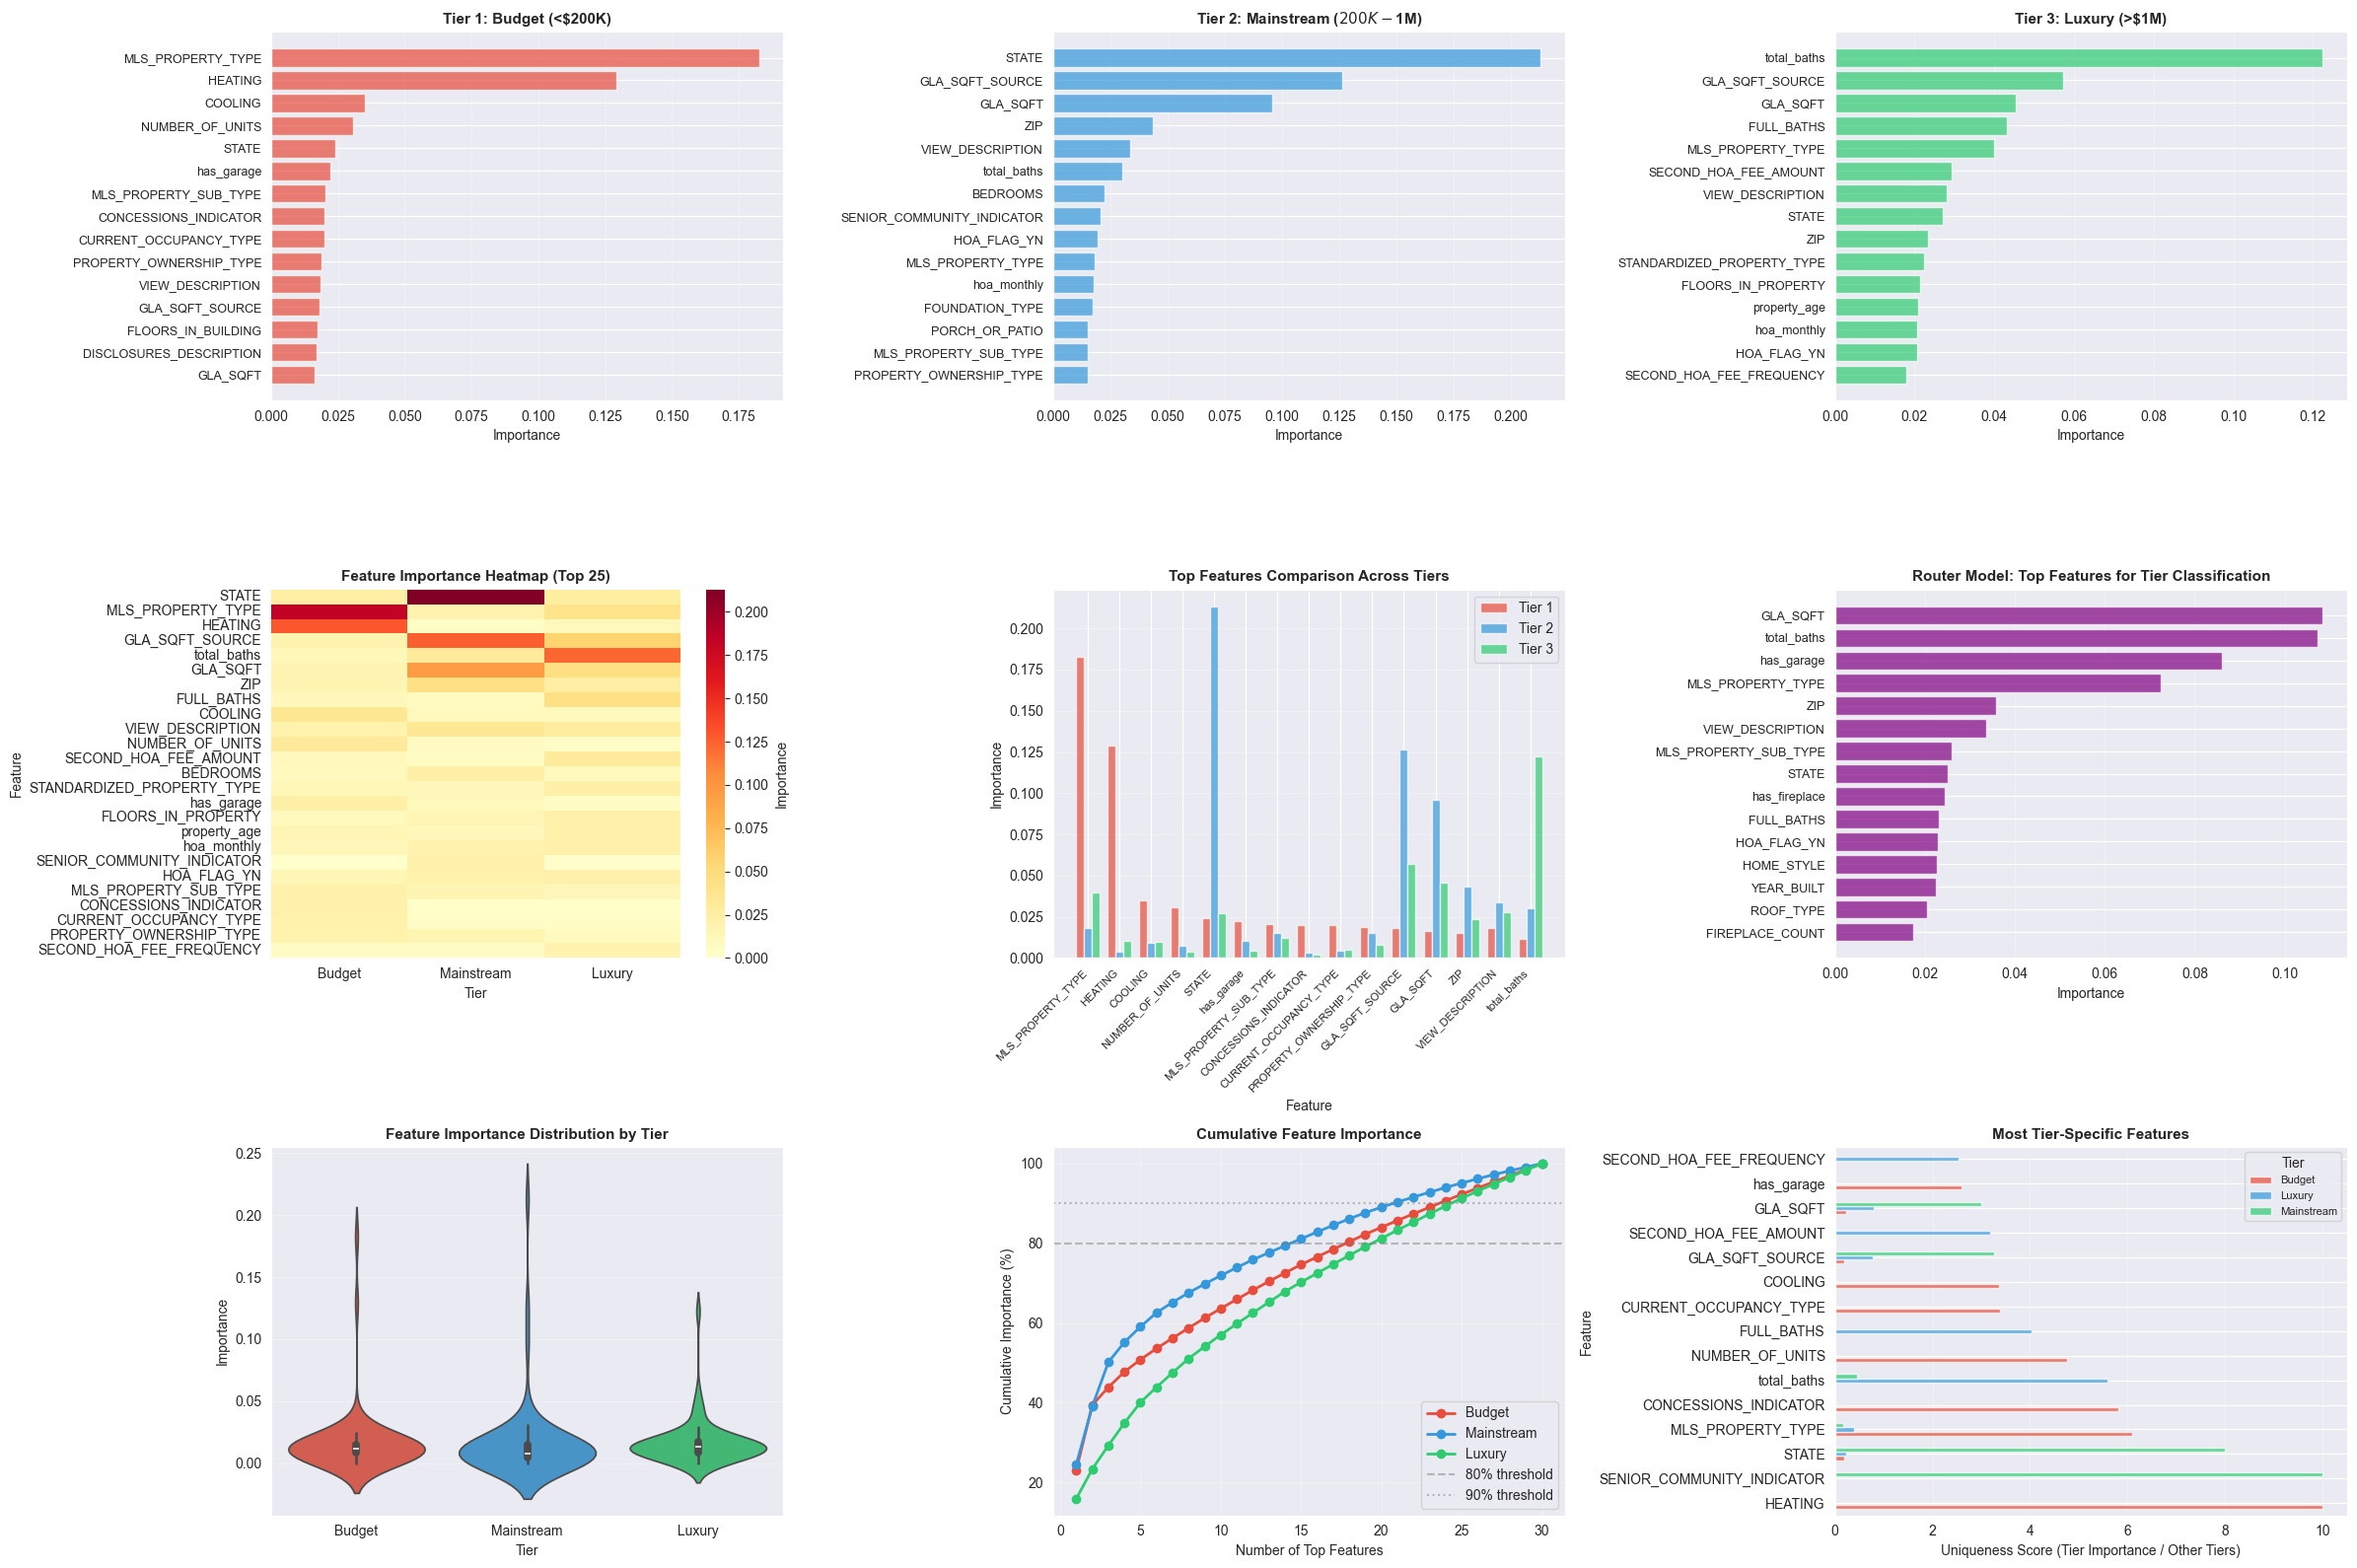


SAVING FEATURE IMPORTANCE DATA
✓ Saved: feature_importance_analysis.pkl

KEY INSIGHTS

🎯 Feature Concentration:
  Budget               Top 5:  40.2% | Top 10:  50.3%
  Mainstream           Top 5:  51.3% | Top 10:  62.4%
  Luxury               Top 5:  30.8% | Top 10:  43.9%

🔍 Most Important Feature per Tier:
  Budget               MLS_PROPERTY_TYPE              (0.182604)
  Mainstream           STATE                          (0.213043)
  Luxury               total_baths                    (0.122457)

🎪 Most Important for Router (Tier Classification):
  14. GLA_SQFT                       (0.108479)
  55. total_baths                    (0.107366)
  58. has_garage                     (0.086016)
  7. MLS_PROPERTY_TYPE              (0.072418)
  2. ZIP                            (0.035780)

✅ FEATURE IMPORTANCE ANALYSIS COMPLETE!

💾 Output Files:
   - feature_importance_analysis.png (visualizations)
   - feature_importance_analysis.pkl (detailed data)


In [4]:
"""
Tiered Model Feature Importance Analysis
Analyzes and visualizes feature importance for each tier model
Run this AFTER training the tiered model system
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings; warnings.filterwarnings('ignore')

# ============================================================================
# LOAD TIERED MODEL SYSTEM
# ============================================================================
print("="*70)
print("FEATURE IMPORTANCE ANALYSIS - TIERED MODEL SYSTEM")
print("="*70)

tiered_system = joblib.load('tiered_model_system.pkl')

router_model = tiered_system['router_model']
tier_models = tiered_system['tier_models']
feature_names = tiered_system['feature_names']
tier_config = tiered_system['tier_config']

# ============================================================================
# EXTRACT FEATURE IMPORTANCE FOR EACH TIER
# ============================================================================
print("\n" + "="*70)
print("TOP 20 FEATURES BY TIER")
print("="*70)

tier_importance_dfs = {}

for tier_id in [0, 1, 2]:
    tier_name = ['Budget (<$200K)', 'Mainstream ($200K-$1M)', 'Luxury (>$1M)'][tier_id]
    model = tier_models[tier_id]

    # Get feature importance
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    tier_importance_dfs[tier_id] = importance_df

    print(f"\n{'='*70}")
    print(f"TIER {tier_id + 1}: {tier_name}")
    print(f"{'='*70}")
    print(f"{'Rank':<6} {'Feature':<35} {'Importance':<12} {'% of Total':<12}")
    print("-"*70)

    total_importance = importance_df['importance'].sum()

    for idx, (_, row) in enumerate(importance_df.head(20).iterrows(), 1):
        pct = (row['importance'] / total_importance) * 100
        print(f"{idx:<6} {row['feature']:<35} {row['importance']:<12.6f} {pct:<11.2f}%")

    print(f"\nTop 5 features account for: {(importance_df.head(5)['importance'].sum() / total_importance * 100):.1f}% of importance")
    print(f"Top 10 features account for: {(importance_df.head(10)['importance'].sum() / total_importance * 100):.1f}% of importance")

# ============================================================================
# FEATURE IMPORTANCE COMPARISON ACROSS TIERS
# ============================================================================
print("\n" + "="*70)
print("FEATURE IMPORTANCE COMPARISON ACROSS TIERS")
print("="*70)

# Get top 15 features from each tier
top_features_per_tier = set()
for tier_id in [0, 1, 2]:
    top_features_per_tier.update(tier_importance_dfs[tier_id].head(15)['feature'].tolist())

# Create comparison dataframe
comparison_data = []
for feature in top_features_per_tier:
    row = {'feature': feature}
    for tier_id in [0, 1, 2]:
        importance = tier_importance_dfs[tier_id][tier_importance_dfs[tier_id]['feature'] == feature]['importance'].values
        row[f'tier_{tier_id}'] = importance[0] if len(importance) > 0 else 0
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
comparison_df['max_importance'] = comparison_df[['tier_0', 'tier_1', 'tier_2']].max(axis=1)
comparison_df = comparison_df.sort_values('max_importance', ascending=False)

print(f"\n{'Feature':<35} {'Budget':<15} {'Mainstream':<15} {'Luxury':<15}")
print("-"*80)

for _, row in comparison_df.head(25).iterrows():
    print(f"{row['feature']:<35} {row['tier_0']:<15.6f} {row['tier_1']:<15.6f} {row['tier_2']:<15.6f}")

# ============================================================================
# IDENTIFY TIER-SPECIFIC FEATURES
# ============================================================================
print("\n" + "="*70)
print("TIER-SPECIFIC FEATURE ANALYSIS")
print("="*70)

def get_tier_specific_features(tier_id, top_n=10):
    """Find features that are important for this tier but not others"""
    tier_importance = tier_importance_dfs[tier_id].set_index('feature')['importance']

    # Get other tiers
    other_tiers = [i for i in [0, 1, 2] if i != tier_id]
    other_importance = pd.concat([
        tier_importance_dfs[i].set_index('feature')['importance']
        for i in other_tiers
    ], axis=1).mean(axis=1)

    # Calculate relative importance (this tier vs others)
    relative_importance = tier_importance / (other_importance + 1e-10)
    relative_importance = relative_importance.sort_values(ascending=False)

    return relative_importance.head(top_n)

for tier_id in [0, 1, 2]:
    tier_name = ['Budget (<$200K)', 'Mainstream ($200K-$1M)', 'Luxury (>$1M)'][tier_id]

    print(f"\n{tier_name}:")
    print("-"*70)
    print(f"{'Feature':<35} {'This Tier':<15} {'Other Tiers':<15} {'Ratio':<10}")
    print("-"*70)

    tier_specific = get_tier_specific_features(tier_id, top_n=10)

    other_tiers = [i for i in [0, 1, 2] if i != tier_id]

    for feature, ratio in tier_specific.items():
        this_tier_imp = tier_importance_dfs[tier_id].set_index('feature').loc[feature, 'importance']
        other_tier_imp = np.mean([
            tier_importance_dfs[i].set_index('feature').loc[feature, 'importance']
            if feature in tier_importance_dfs[i]['feature'].values else 0
            for i in other_tiers
        ])

        print(f"{feature:<35} {this_tier_imp:<15.6f} {other_tier_imp:<15.6f} {ratio:<10.2f}x")

# ============================================================================
# ROUTER MODEL FEATURE IMPORTANCE
# ============================================================================
print("\n" + "="*70)
print("ROUTER MODEL - TOP 20 FEATURES FOR TIER CLASSIFICATION")
print("="*70)

router_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': router_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n{'Rank':<6} {'Feature':<35} {'Importance':<12}")
print("-"*70)

for idx, (_, row) in enumerate(router_importance_df.head(20).iterrows(), 1):
    print(f"{idx:<6} {row['feature']:<35} {row['importance']:<12.6f}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print("\n" + "="*70)
print("GENERATING FEATURE IMPORTANCE VISUALIZATIONS")
print("="*70)

fig = plt.figure(figsize=(24, 16))

# 1. Top 15 Features per Tier (Side by Side)
for tier_id in [0, 1, 2]:
    ax = plt.subplot(3, 3, tier_id + 1)

    tier_name = ['Budget (<$200K)', 'Mainstream ($200K-$1M)', 'Luxury (>$1M)'][tier_id]
    importance_df = tier_importance_dfs[tier_id].head(15)

    colors = ['#e74c3c', '#3498db', '#2ecc71'][tier_id]

    ax.barh(range(len(importance_df)), importance_df['importance'], color=colors, alpha=0.7)
    ax.set_yticks(range(len(importance_df)))
    ax.set_yticklabels(importance_df['feature'], fontsize=9)
    ax.set_xlabel('Importance', fontsize=10)
    ax.set_title(f'Tier {tier_id + 1}: {tier_name}', fontsize=11, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)

# 2. Feature Importance Heatmap (Top 20 features across all tiers)
ax4 = plt.subplot(3, 3, 4)

# Get top 20 features overall
all_features = set()
for tier_id in [0, 1, 2]:
    all_features.update(tier_importance_dfs[tier_id].head(20)['feature'].tolist())

heatmap_data = []
heatmap_labels = []

for feature in all_features:
    row = []
    for tier_id in [0, 1, 2]:
        imp = tier_importance_dfs[tier_id][tier_importance_dfs[tier_id]['feature'] == feature]['importance'].values
        row.append(imp[0] if len(imp) > 0 else 0)

    max_imp = max(row)
    if max_imp > 0.01:  # Only include features with meaningful importance
        heatmap_data.append(row)
        heatmap_labels.append(feature)

heatmap_df = pd.DataFrame(heatmap_data, columns=['Budget', 'Mainstream', 'Luxury'], index=heatmap_labels)
heatmap_df = heatmap_df.loc[heatmap_df.max(axis=1).sort_values(ascending=False).index]

sns.heatmap(heatmap_df.head(25), annot=False, cmap='YlOrRd', ax=ax4, cbar_kws={'label': 'Importance'})
ax4.set_title('Feature Importance Heatmap (Top 25)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Tier', fontsize=10)
ax4.set_ylabel('Feature', fontsize=10)

# 3. Comparison of Top 5 Features per Tier (Grouped Bar)
ax5 = plt.subplot(3, 3, 5)

top_n = 10
tier_colors = ['#e74c3c', '#3498db', '#2ecc71']

# Get unique features from top 10 of each tier
unique_features = []
for tier_id in [0, 1, 2]:
    unique_features.extend(tier_importance_dfs[tier_id].head(top_n)['feature'].tolist())
unique_features = list(dict.fromkeys(unique_features))[:15]  # Keep order, limit to 15

x = np.arange(len(unique_features))
width = 0.25

for tier_id in [0, 1, 2]:
    tier_importance = tier_importance_dfs[tier_id].set_index('feature')
    importances = [tier_importance.loc[f, 'importance'] if f in tier_importance.index else 0
                   for f in unique_features]

    ax5.bar(x + tier_id * width, importances, width,
           label=f'Tier {tier_id + 1}', color=tier_colors[tier_id], alpha=0.7)

ax5.set_xlabel('Feature', fontsize=10)
ax5.set_ylabel('Importance', fontsize=10)
ax5.set_title('Top Features Comparison Across Tiers', fontsize=11, fontweight='bold')
ax5.set_xticks(x + width)
ax5.set_xticklabels(unique_features, rotation=45, ha='right', fontsize=8)
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 4. Router Model Top 15 Features
ax6 = plt.subplot(3, 3, 6)

router_top = router_importance_df.head(15)
ax6.barh(range(len(router_top)), router_top['importance'], color='purple', alpha=0.7)
ax6.set_yticks(range(len(router_top)))
ax6.set_yticklabels(router_top['feature'], fontsize=9)
ax6.set_xlabel('Importance', fontsize=10)
ax6.set_title('Router Model: Top Features for Tier Classification', fontsize=11, fontweight='bold')
ax6.invert_yaxis()
ax6.grid(axis='x', alpha=0.3)

# 5. Feature Importance Distribution (Violin Plot)
ax7 = plt.subplot(3, 3, 7)

distribution_data = []
for tier_id in [0, 1, 2]:
    tier_name = ['Budget', 'Mainstream', 'Luxury'][tier_id]
    for imp in tier_importance_dfs[tier_id]['importance'].values:
        distribution_data.append({'Tier': tier_name, 'Importance': imp})

distribution_df = pd.DataFrame(distribution_data)

sns.violinplot(data=distribution_df, x='Tier', y='Importance', palette=['#e74c3c', '#3498db', '#2ecc71'], ax=ax7)
ax7.set_title('Feature Importance Distribution by Tier', fontsize=11, fontweight='bold')
ax7.set_ylabel('Importance', fontsize=10)
ax7.grid(axis='y', alpha=0.3)

# 6. Cumulative Importance (Top N features)
ax8 = plt.subplot(3, 3, 8)

for tier_id in [0, 1, 2]:
    tier_name = ['Budget', 'Mainstream', 'Luxury'][tier_id]
    importance_df = tier_importance_dfs[tier_id].head(30)

    cumsum = (importance_df['importance'].cumsum() / importance_df['importance'].sum() * 100).values

    ax8.plot(range(1, len(cumsum) + 1), cumsum,
            marker='o', label=tier_name, color=tier_colors[tier_id], linewidth=2)

ax8.axhline(y=80, color='gray', linestyle='--', alpha=0.5, label='80% threshold')
ax8.axhline(y=90, color='gray', linestyle=':', alpha=0.5, label='90% threshold')
ax8.set_xlabel('Number of Top Features', fontsize=10)
ax8.set_ylabel('Cumulative Importance (%)', fontsize=10)
ax8.set_title('Cumulative Feature Importance', fontsize=11, fontweight='bold')
ax8.legend()
ax8.grid(alpha=0.3)

# 7. Feature Uniqueness Score (How tier-specific)
ax9 = plt.subplot(3, 3, 9)

# Calculate uniqueness score for each tier's top features
uniqueness_data = []
for tier_id in [0, 1, 2]:
    tier_name = ['Budget', 'Mainstream', 'Luxury'][tier_id]

    for feature in tier_importance_dfs[tier_id].head(15)['feature']:
        this_tier_imp = tier_importance_dfs[tier_id].set_index('feature').loc[feature, 'importance']

        other_tiers = [i for i in [0, 1, 2] if i != tier_id]
        other_imp = np.mean([
            tier_importance_dfs[i].set_index('feature').loc[feature, 'importance']
            if feature in tier_importance_dfs[i]['feature'].values else 0
            for i in other_tiers
        ])

        # Uniqueness score: higher when this tier value >> others
        uniqueness = this_tier_imp / (other_imp + 0.001)

        uniqueness_data.append({
            'Tier': tier_name,
            'Feature': feature,
            'Uniqueness': min(uniqueness, 10)  # Cap at 10x for visualization
        })

uniqueness_df = pd.DataFrame(uniqueness_data)
uniqueness_pivot = uniqueness_df.pivot_table(values='Uniqueness', index='Feature', columns='Tier', fill_value=0)

# Show top 15 most unique features
top_unique = uniqueness_pivot.max(axis=1).sort_values(ascending=False).head(15)
plot_data = uniqueness_pivot.loc[top_unique.index]

plot_data.plot(kind='barh', stacked=False, ax=ax9, color=['#e74c3c', '#3498db', '#2ecc71'], alpha=0.7)
ax9.set_xlabel('Uniqueness Score (Tier Importance / Other Tiers)', fontsize=10)
ax9.set_ylabel('Feature', fontsize=10)
ax9.set_title('Most Tier-Specific Features', fontsize=11, fontweight='bold')
ax9.legend(title='Tier', fontsize=8)
ax9.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: feature_importance_analysis.png")
plt.show()

# ============================================================================
# SAVE FEATURE IMPORTANCE DATA
# ============================================================================
print("\n" + "="*70)
print("SAVING FEATURE IMPORTANCE DATA")
print("="*70)

feature_analysis = {
    'tier_importance': tier_importance_dfs,
    'router_importance': router_importance_df,
    'comparison': comparison_df,
    'tier_specific_features': {
        tier_id: get_tier_specific_features(tier_id, top_n=20)
        for tier_id in [0, 1, 2]
    }
}

joblib.dump(feature_analysis, 'feature_importance_analysis.pkl')
print("✓ Saved: feature_importance_analysis.pkl")

# ============================================================================
# SUMMARY INSIGHTS
# ============================================================================
print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)

print("\n🎯 Feature Concentration:")
for tier_id in [0, 1, 2]:
    tier_name = ['Budget', 'Mainstream', 'Luxury'][tier_id]
    top5_pct = (tier_importance_dfs[tier_id].head(5)['importance'].sum() /
                tier_importance_dfs[tier_id]['importance'].sum() * 100)
    top10_pct = (tier_importance_dfs[tier_id].head(10)['importance'].sum() /
                 tier_importance_dfs[tier_id]['importance'].sum() * 100)

    print(f"  {tier_name:20} Top 5: {top5_pct:>5.1f}% | Top 10: {top10_pct:>5.1f}%")

print("\n🔍 Most Important Feature per Tier:")
for tier_id in [0, 1, 2]:
    tier_name = ['Budget', 'Mainstream', 'Luxury'][tier_id]
    top_feature = tier_importance_dfs[tier_id].iloc[0]
    print(f"  {tier_name:20} {top_feature['feature']:<30} ({top_feature['importance']:.6f})")

print("\n🎪 Most Important for Router (Tier Classification):")
for idx, row in router_importance_df.head(5).iterrows():
    print(f"  {idx+1}. {row['feature']:<30} ({row['importance']:.6f})")

print("\n" + "="*70)
print("✅ FEATURE IMPORTANCE ANALYSIS COMPLETE!")
print("="*70)
print("\n💾 Output Files:")
print("   - feature_importance_analysis.png (visualizations)")
print("   - feature_importance_analysis.pkl (detailed data)")
print("="*70)
